In [19]:
!pip3 install yfinance
!pip3 install prophet
!pip3 install deap
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.5-py3-none-macosx_11_0_arm64.whl (8.2 MB)
  Using cached holidays-0.48-py3-none-any.whl (1.0 MB)
  Using cached cmdstanpy-1.2.2-py3-none-any.whl (94 kB)
     |████████████████████████████████| 78 kB 5.9 MB/s eta 0:00:011
  Using cached stanio-0.5.0-py3-none-any.whl (8.0 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:


import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming 'returns' DataFrame contains historical returns for each stock

# Step 1: Prepare the data for Facebook Prophet
# Reset index to make 'Date' a column
returns.reset_index(inplace=True)

# Prophet expects the column names to be 'ds' and 'y'
returns.columns = ['ds'] + returns.columns[1:].tolist()

# Get current date and calculate 3 years from now
today = datetime.today()
future_date = today + pd.DateOffset(years=3)

# Step 2: Train the Prophet model and make future projections
projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})  # Next 3 years
for column in returns.columns[1:]:
    # Train Prophet model
    model = Prophet()
    model.fit(returns[['ds', column]])

    # Make future projections
    future = model.make_future_dataframe(periods=1095)  # 3 years
    forecast = model.predict(future)

    # Extract projected returns
    projected_returns[column] = forecast['yhat']

# Step 3: Create a projected returns DataFrame

# Step 4: Perform segmentation on the historical and projected returns
# You can use the same segmentation approach as before

# Step 5: Plot the historical and projected values for the selected efficient stock
# For this, you can select one of the stocks from the efficient segment and plot its historical and projected returns

# Example plot for historical and projected returns of a selected stock
selected_stock = 'AAPL'  # Example: Apple stock
plt.figure(figsize=(10, 6))
plt.plot(returns['ds'], returns[selected_stock], label='Historical Returns', color='blue')
plt.plot(projected_returns['ds'], projected_returns[selected_stock], label='Projected Returns', color='red')
plt.title(f'Historical vs Projected Returns for {selected_stock}')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

Defaulting to user installation because normal site-packages is not writeable
  Using cached deap-1.4.1.tar.gz (1.1 MB)
  Created wheel for deap: filename=deap-1.4.1-cp39-cp39-macosx_10_9_universal2.whl size=111825 sha256=711346af5c42652797fee40eced082ff682ac8d47cf94d0daf38847a2a09e071
  Stored in directory: /Users/fbarahona/Library/Caches/pip/wheels/d9/58/fd/a64ce13f5e2324689e8bc1857c9562d53020d96cc88f5bf787
Successfully built deap
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 42.7 MB/s eta 0:00:01
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
     |████████████████████████████████| 66 kB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [401]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import numpy as np
import seaborn as sns
from deap import base, creator, tools, algorithms
import pickle
from datetime import timedelta

class Portfolio:
    def print_portfolio_details(self):
        print(f"Portfolio Name: {self.get_name()}")
        print(f"Average Return Rate: {self.calculate_portfolio_return() * 100:.2f}%")
        print(f"Sharpe Ratio: {self.calculate_sharpe_ratio():.2f}")
        print("Weights per Symbol:")
        for symbol, weight in zip(self.symbols, self.weights):
            if weight>0:
                print(f"{symbol}: {weight * 100:.2f}%")
        self.efficient_frontier()
    def print_dataframes(self):
        # Convert avg_returns and weights to DataFrames
        df_avg_returns = pd.DataFrame(self.avg_returns, columns=['Avg_Return'])
        df_weights = pd.DataFrame({'Weights': self.weights})

        # Concatenate the DataFrames horizontally
        df_combined = pd.concat([df_avg_returns, df_weights], axis=1)

        # Print the combined DataFrame
        print("Combined DataFrame:")
        print(df_combined)
        print(self.avg_returns)
        print(self.weights)
        print(sum(self.weights))
    def set_name(self,name):
        self.name =name
    def get_name(self):
        return self.name
    def set_market_data(self, market_data):
        self.market_data = market_data
        data_close=self.market_data.transpose().dropna().transpose()
        self.avg_returns = returns = np.log(data_close / data_close.shift(1)) #self.market_data[self.symbols].pct_change().mean()
        self.assign_weights_markowitz()
        self.portfolio_return = np.dot(self.avg_returns, self.weights)


    def __init__(self,market_data, symbols):
        self.symbols = symbols

        self.set_market_data(market_data)


    def assign_weights_markowitz(self,  population_size=50, num_generations=100):
      returns_data=self.avg_returns
      num_assets = len(self.symbols)
      creator.create("FitnessMax", base.Fitness, weights=(1.0,))
      creator.create("Individual", list, fitness=creator.FitnessMax)
      def evaluate(individual):
        portfolio_return = np.dot(returns_data.mean(), individual)
        portfolio_risk = np.sqrt(np.dot(individual, np.dot(returns_data.cov(), individual)))
        sharpe_ratio = portfolio_return / portfolio_risk
        return sharpe_ratio,

      toolbox = base.Toolbox()
      def mate(ind1, ind2):
        ind1, ind2 = tools.cxBlend(ind1, ind2, alpha=0.5)
        ind1 = creator.Individual([max(0, w) for w in ind1])
        ind2 = creator.Individual([max(0, w) for w in ind2])
        return ind1, ind2

      def mutate(individual):
        individual, = tools.mutGaussian(individual, mu=0, sigma=0.2, indpb=0.2)
        individual = creator.Individual([max(0, w) for w in individual])
        return individual,
      toolbox.register("attr_float", random.random)
      toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=num_assets)
      toolbox.register("population", tools.initRepeat, list, toolbox.individual)
      #toolbox.register("mate", tools.cxBlend, alpha=0.5)
      #toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
      toolbox.register("mate", mate)
      toolbox.register("mutate", mutate)
      toolbox.register("select", tools.selTournament, tournsize=3)
      toolbox.register("evaluate", evaluate)

      #def enforce_non_negative(*individuals):
      #  return [[max(0, w) for w in individual] for individual in individuals]

      #toolbox.decorate("mate", enforce_non_negative)
      #toolbox.decorate("mutate", enforce_non_negative)

      population = toolbox.population(n=population_size)
      algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations, verbose=False)

      best_individual = tools.selBest(population, k=1)[0]
      total_weight = sum(best_individual)
      self.weights = [round(w / total_weight, 2) for w in best_individual]

    def calculate_portfolio_return(self):

        self.portfolio_return = np.dot(self.avg_returns.mean(), self.weights)
        #print("return")
        #print(self.portfolio_return)
        #print(" end return")
        return self.portfolio_return

    def calculate_sharpe_ratio(self):
        avg_returns = self.portfolio_return
        std_dev = self.calculate_risk_ratio()
        portfolio_return = self.calculate_portfolio_return()
        risk_free_rate = 0.02
        sharpe_ratio = (portfolio_return - risk_free_rate) / std_dev.mean()
        return sharpe_ratio

    def calculate_risk_ratio(self):
      cov_matrix = self.avg_returns.cov()

      weights = np.array(self.weights)
      portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
      portfolio_risk = np.sqrt(portfolio_variance)

      return portfolio_risk


    def efficient_frontier(self,  num_portfolios=10000):
        returns_data=self.avg_returns
        returns_mean = returns_data.mean()
        returns_cov = returns_data.cov()

        portfolio_returns = []
        portfolio_risks = []

        for _ in range(num_portfolios):
            weights = np.random.random(len(self.symbols))
            weights /= np.sum(weights)  # Normalize weights to ensure they sum up to 1

            portfolio_return = np.dot(returns_mean, weights)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns_cov, weights)))

            portfolio_returns.append(portfolio_return)
            portfolio_risks.append(portfolio_risk)
        
        additional_return = self.calculate_portfolio_return()
        additional_risk = self.calculate_risk_ratio()

        plt.figure(figsize=(10, 6))
        plt.scatter(portfolio_risks, portfolio_returns, alpha=0.3)
        plt.scatter(additional_risk, additional_return, color='red', marker='*', label='Additional Point')
        plt.title('Efficient Frontier')
        plt.xlabel('Risk')
        plt.ylabel('Return')
        plt.show()
    def print_stock_return_details(self, pdate):
        # Create a DataFrame to store the details
        data = {
            'Symbol': [],
            'Avg Close Price': [],
            'Last Close Price': [],
            'Weight': [],
            'Return': [],
            'Weighted Return': []
        }
        max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()
        # Calculate today's date or the latest available date
        latest_date = self.market_data.index.max()
        #latest_date = self.avg_returns.index[-1].date()
        print("from:")
        print(max_date_before_begin)
        print ("to:")
        print(latest_date)
        # Ensure date is not in the future
        date = min(max_date_before_begin, latest_date)

        # Calculate the percentage change in close price from the specified date to the latest available date
        #pct_change = (self.market_data.loc[latest_date] / self.market_data.loc[date] - 1) * 100
        pct_changes = (self.market_data.iloc[-1] / self.market_data.loc[date] - 1) * 100
        # Iterate over symbols
        for symbol, weight in zip(self.symbols, self.weights):
            avg_close_price = self.market_data.loc[date, symbol]
            last_close_price = self.market_data.iloc[-1][symbol]
            weighted_return = pct_changes[symbol] * weight / 100

            # Append details to the DataFrame
            data['Symbol'].append(symbol)
            data['Avg Close Price'].append(avg_close_price)
            data['Last Close Price'].append(last_close_price)
            data['Weight'].append(weight)
            data['Return'].append(pct_changes[symbol])
            data['Weighted Return'].append(weighted_return)

        # Create DataFrame from the collected data
        df = pd.DataFrame(data)

        # Filter out stocks with zero weight
        df = df[df['Weight'] > 0]

        # Calculate sum of weighted returns
        sum_weighted_returns = df['Weighted Return'].sum()

        # Print the DataFrame
        print(f"Portfolio Name: {self.get_name()} - Sum of Weighted Returns: {sum_weighted_returns:.2f}")
        print(df)

        # Plot line chart for each selected symbol
        plt.figure(figsize=(12, 6))
        for symbol in df['Symbol']:
            plt.plot(self.market_data.index, self.market_data[symbol], label=symbol)

        # Highlight the range between specified date and latest date
        plt.axvspan(date, latest_date, color='gray', alpha=0.3)

        plt.title('Closing Prices Evolution')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.grid(True)
        plt.show()

class PortfolioOptimization:
    trading_days=252
    symbols= None
    def __init__(self):
        self.portfolios = []
        self.market_data = pd.DataFrame()
        self.portfolio_start_date = pd.Timestamp('2024-05-24').date()
    def trim_market_data(self):
        # Calculate the maximum date for each symbol
        max_dates = self.market_data.apply(pd.Series.last_valid_index)

        # Determine the mode (most frequent) of these maximum dates
        mode_date = max_dates.mode().iloc[0]  # Get the first mode if multiple modes exist

        # Calculate the start date for the 3-month period
        start_date = mode_date - timedelta(days=90)

        # Filter stocks based on available data for the past 3 months (including the mode date)
        valid_symbols = []
        for symbol in self.symbols:
            symbol_data = self.market_data[symbol]
            if symbol_data.index[-1] >= mode_date and start_date in symbol_data.index:
                valid_symbols.append(symbol)
        
    def fetch_market_data(self):
        # Get S&P 500 symbols
        table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        df = table[0]
        symbols = df['Symbol'].str.replace('.', '-').values.tolist()
        self.symbols=symbols
        # Get daily prices for the last 3 years
        end = pd.to_datetime('today')
        start = end - pd.DateOffset(years=3)
        data = yf.download(symbols, start=start, end=end)

        # Update market data
        self.market_data = data['Adj Close']
        self.trim_market_data()
    def update_market_data(self):
        # Get S&P 500 symbols
        table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        df = table[0]
        symbols = df['Symbol'].str.replace('.', '-').values.tolist()
        self.symbols=symbols
        # Get daily prices for the last 3 years
        end = pd.to_datetime('today')
        last_available_date = self.market_data.index[-1] if not self.market_data.empty else None

    # Set the start date based on the last available date or default to 3 years ago
        if last_available_date:
          start = last_available_date + pd.DateOffset(days=1)
        else:
          start = pd.to_datetime('today') - pd.DateOffset(years=3)
        data = yf.download(symbols, start=start, end=end)

        # Update market data
        all_columns = self.market_data.columns.union(data['Adj Close'].columns)

        self.market_data = self.market_data.reindex(columns=all_columns)
        data = data['Adj Close'].reindex(columns=all_columns)
        self.market_data = pd.concat([self.market_data, data], axis=0)
        self.trim_market_data()
    def create_portfolio(self, portfolio_function):
        portfolio = portfolio_function(self.market_data)
        portfolio.set_name(portfolio_function.__name__);
        self.portfolios.append(portfolio)


    def print_portfolio_returns(self):
        for i, portfolio in enumerate(self.portfolios):
            #print(i)
            #print(portfolio)
            print(f"Portfolio {i + 1} weighted return: {portfolio.calculate_portfolio_return()*100*self.trading_days}")
           # print(portfolio.print_dataframes())
            print(portfolio.get_name())
            portfolio.print_portfolio_details()
        print("Market")
        print(np.log(self.market_data / self.market_data.shift(1)).mean().mean()*100*self.trading_days)

    def print_stock_return_details(self):
        for i, portfolio in enumerate(self.portfolios):
            print(portfolio.get_name())
            portfolio.print_stock_return_details(self.portfolio_start_date)
        
    def set_portfolio_start_date(date):
            self.portfolio_start_date=date
    
    def plot_portfolio_returns(self, interval='month'):

        if interval == 'month':
            start_date = pd.Timestamp.now().normalize() - pd.DateOffset(months=1)
        elif interval == 'year_to_date':
            start_date = pd.Timestamp.now().normalize().replace(month=1, day=1)
        elif interval == 'one_year':
            start_date = pd.Timestamp.now().normalize() - pd.DateOffset(years=1)
        elif interval == 'whole_period':
            start_date = self.market_data.index[0]
        else:
            raise ValueError("Invalid interval. Please choose from 'month', 'year_to_date', 'one_year', or 'whole_period'.")

        fig, ax = plt.subplots(figsize=(10, 6))
        for i, portfolio in enumerate(self.portfolios):
            returns = portfolio.calculate_portfolio_return()
            ax.plot(i, returns, label=f"Portfolio {i + 1}")

        ax.set_title(f"Portfolio Returns ({interval.capitalize()})")
        ax.set_xlabel("Date")
        ax.set_ylabel("Return Rate")
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    def save_data(self, filename='data.dat'):
        with open(filename, 'wb') as f:
            pickle.dump({'market_data': self.market_data,'symbols':self.symbols, 'portfolios': self.portfolios}, f)

    def load_data(self, filename='data.dat'):
        
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            self.market_data = data['market_data']
            self.portfolios = data['portfolios']
            self.symbols = data['symbols']
        self.trim_market_data()



    def plot_avg_portfolio_returns(self):
        portfolio_names = [p.get_name() for p in self.portfolios] + ['Market']
        avg_returns = [p.calculate_portfolio_return() *self.trading_days for p in self.portfolios]
        market_return =np.log(self.market_data / self.market_data.shift(1)).mean().mean()*self.trading_days  # Calculate market return
        #print(avg_returns)
        avg_returns.append(market_return)
        #print(avg_returns)
        plt.figure(figsize=(10, 6))
        bars = plt.barh(portfolio_names, avg_returns, color='skyblue')  # Create horizontal bar chart

        # Add percentage labels next to each bar
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

        plt.xlabel('Average Return ')
        plt.title('Average Portfolio Returns')
        plt.show()

    def plot_risk_vs_return(self):
        for p in self.portfolios:
            risk = p.calculate_risk_ratio()
            return_ = p.calculate_portfolio_return() *self.trading_days
            plt.scatter(risk, return_, label=p.get_name())

        # Add individual stocks
        for symbol in self.market_data.columns:
            returns = np.log(self.market_data[symbol] / self.market_data[symbol].shift(1)).dropna()
            plt.scatter(returns.std() , returns.mean()*self.trading_days , color='grey', alpha=0.5)

        # Add market data
       # market_return = np.log(self.market_data / self.market_data.shift(1)).sum().mean()
       # market_risk = self.market_data.std().mean()
       # plt.scatter(market_risk, market_return, label='Market', color='red')

        plt.xlabel('Risk ')
        plt.ylabel('Return ')
        plt.title('Risk vs Return')
        plt.legend()
        plt.show()

    def plot_6_month_returns(self):
        end = pd.to_datetime('today')
        start = end - pd.DateOffset(months=6)

        for p in self.portfolios:
            weights = np.array(p.weights)
            returns = np.log(p.market_data.loc[start:end]/p.market_data.loc[start:end].shift(1)).dropna()
            portfolio_returns = (weights * returns).sum(axis=1)
            plt.plot(portfolio_returns.index, portfolio_returns.values, label=p.get_name())

        # Add market data
        market_returns = np.log(self.market_data.loc[start:end] / self.market_data.loc[start:end].shift(1)).mean(axis=1)
        plt.plot(market_returns.index, market_returns.values, label='Market', color='red')

        plt.xlabel('Date')
        plt.ylabel('Return ')
        plt.title('Portfolio Returns Over the Last 6 Months')
        plt.legend()
        plt.show()



        # Update symbols and market data
        self.symbols = valid_symbols
        self.market_data = self.market_data[self.symbols]


    def plot_portfolio_matrix(self):
        # Get all unique symbols across all portfolios
        all_symbols = list(set(symbol for p in self.portfolios for symbol in p.symbols))  # Convert set to list

        # Create binary matrices for each portfolio
        portfolio_matrices = []
        for p in self.portfolios:
            portfolio_matrix = pd.DataFrame(0, index=all_symbols, columns=[p.get_name()])
            portfolio_matrix.loc[p.symbols, p.get_name()] = 1
            portfolio_matrices.append(portfolio_matrix)

        # Combine the binary matrices into a single DataFrame
        combined_matrix = pd.concat(portfolio_matrices, axis=1)

        # Plot the matrix as a heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(combined_matrix.T, cmap='coolwarm', cbar=False, annot=True, fmt='f', linewidths=0.5)
        plt.title('Portfolio Inclusion Matrix')
        plt.xlabel('Stocks')
        plt.ylabel('Portfolios')
        plt.yticks(rotation=0)
        plt.show()




In [115]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming normal_stocks_df contains historical returns for each stock
# Calculate the average return and standard deviation of returns for each stock

def Create_Best_Peformers_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.iloc[-30:].sum()
  top_10_stocks = total_returns.nlargest(10)
  retVal = Portfolio(market_data[top_10_stocks.index.tolist()],top_10_stocks.index.tolist())
  return retVal

def Create_More_Risky_Peformers_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.iloc[-30:].std()
  top_10_stocks = total_returns.nlargest(10)
  retVal = Portfolio(market_data[top_10_stocks.index.tolist()],top_10_stocks.index.tolist())
  return retVal


def Create_Kmeans_Portfolio(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.sum()
  current_year = pd.Timestamp.now().year
  df_current_year = returns[returns.index.year == current_year]


  normal_stocks = total_returns.index

  normal_stocks_df = returns[normal_stocks]

  average_returns = normal_stocks_df.mean(axis=0)
  volatility = normal_stocks_df.std(axis=0)

# Combine average returns and volatility into one DataFrame
  features = pd.concat([average_returns, volatility], axis=1)
  features.columns = ['Average Return', 'Volatility']

# Calculate return/risk ratio
  features['Return/Risk Ratio'] = features['Average Return'] / features['Volatility']

# Standardize the data
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)

  i=11
  j=0
  while i>10:
# Perform K-means clustering
    num_clusters = 1+j  #
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
    features['Cluster'] = cluster_labels
# Identify the cluster with the highest return/risk ratio
    cluster_with_highest_return_risk_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().idxmax()

# Select the stocks from that cluster
    selected_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_highest_return_risk_ratio].tolist()
    i=len(selected_stocks)
    #if i<10:
    #  j=j-1
    #else:
    j=j+1

  print("Selected Stocks with Highest Return/Risk Ratio:")
  retVal = Portfolio(market_data[selected_stocks],selected_stocks)
  plt.figure(figsize=(10, 6))
  for cluster in range(num_clusters):
    cluster_data = features[features['Cluster'] == cluster]
    if cluster == cluster_with_highest_return_risk_ratio:  # Compare with the index of the series
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Best performer {cluster}', color='red', marker='x')
    else:
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Cluster  {cluster}', alpha=0.5)
  plt.xlabel('Average Return')
  plt.ylabel('Volatility')
  plt.title('Segmentation of Stocks based on Return and Volatility')
  plt.legend()
  plt.grid(True)
  plt.show()
  return retVal
 # print(selected_stocks)

def Create_Kmeans_Portfolio_Second_Best(market_data):
  data_close=market_data.transpose().dropna().transpose()
  returns = np.log(data_close / data_close.shift(1))
  total_returns = returns.sum()
  current_year = pd.Timestamp.now().year
  df_current_year = returns[returns.index.year == current_year]


  normal_stocks = total_returns.index

  normal_stocks_df = returns[normal_stocks]

  average_returns = normal_stocks_df.mean(axis=0)
  volatility = normal_stocks_df.std(axis=0)

# Combine average returns and volatility into one DataFrame
  features = pd.concat([average_returns, volatility], axis=1)
  features.columns = ['Average Return', 'Volatility']

# Calculate return/risk ratio
  features['Return/Risk Ratio'] = features['Average Return'] / features['Volatility']

# Standardize the data
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)

  i=11
  j=0
  while i>10:
# Perform K-means clustering
    num_clusters = 2+j  #
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
    features['Cluster'] = cluster_labels
    #cluster_counts = features['Cluster'].value_counts()
    #small_clusters = cluster_counts[cluster_counts < 10].index
    #features = features[~features['Cluster'].isin(small_clusters)]

# Identify the cluster with the highest return/risk ratio
    #print(features.groupby('Cluster')['Return/Risk Ratio'].max().nlargest(2).index[1])
    cluster_with_highest_return_risk_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().idxmax()

    selected_max_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_highest_return_risk_ratio].tolist()

    cluster_with_second_highest_ratio = features.groupby('Cluster')['Return/Risk Ratio'].max().nlargest(2).index[1]

# Select the stocks from that cluster
    selected_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_second_highest_ratio].tolist()

# Select the stocks from that cluster
    #i=len(selected_stocks)

    i=len(selected_max_stocks)
    #if i<10:
    #  j=j-1
    #else:
    j=j+1

  print("Selected Stocks with Highest Return/Risk Ratio:")
  print (cluster_with_second_highest_ratio)
  retVal = Portfolio(market_data[selected_stocks],selected_stocks)
  plt.figure(figsize=(10, 6))
  for cluster in range(num_clusters):
    cluster_data = features[features['Cluster'] == cluster]
    if cluster == cluster_with_second_highest_ratio:  # Compare with the index of the series
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Second BEST performer {cluster}', color='red', marker='x')
    else:
        plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Cluster  {cluster}', alpha=0.5)
  plt.xlabel('Average Return')
  plt.ylabel('Volatility')
  plt.title('Segmentation of Stocks based on Return and Volatility')
  plt.legend()
  plt.grid(True)
  plt.show()
  return retVal


In [406]:
port = PortfolioOptimization()

In [430]:
port.update_market_data()

[*********************100%%**********************]  503 of 503 completed


In [266]:
port.fetch_market_data()

[*********************100%%**********************]  503 of 503 completed


In [440]:
port.save_data()

In [407]:
port.load_data()

El portafolio más óptimo está conformado por datos extremos, esto puede traer altos riesgos para los inversionistas.

Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


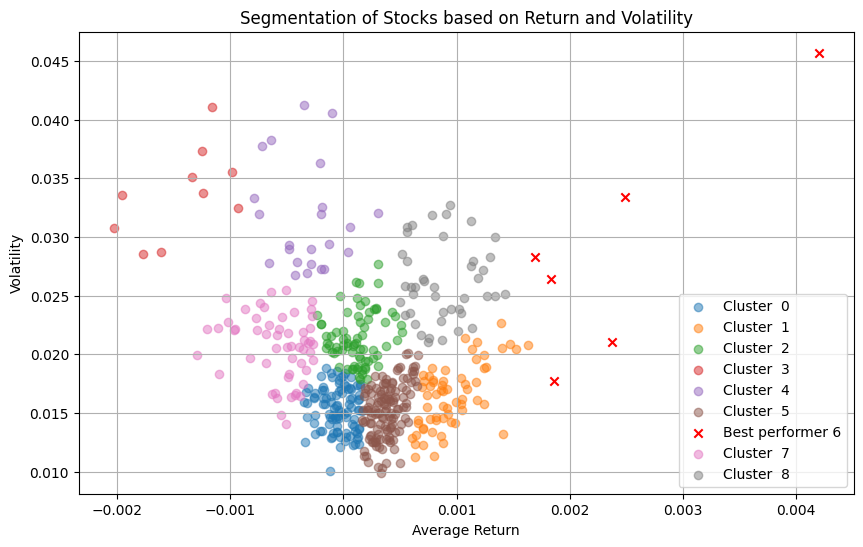

In [327]:
port.create_portfolio(Create_Kmeans_Portfolio)

Se creó un modelo por medio de K medias para seleccionar el segundo potafolio más eficiente, dado que el primero seleccionó stocks con alto rentimiento pero también con alto riesgo, esto es una forma de podar los datos extremos

Selected Stocks with Highest Return/Risk Ratio:
1


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


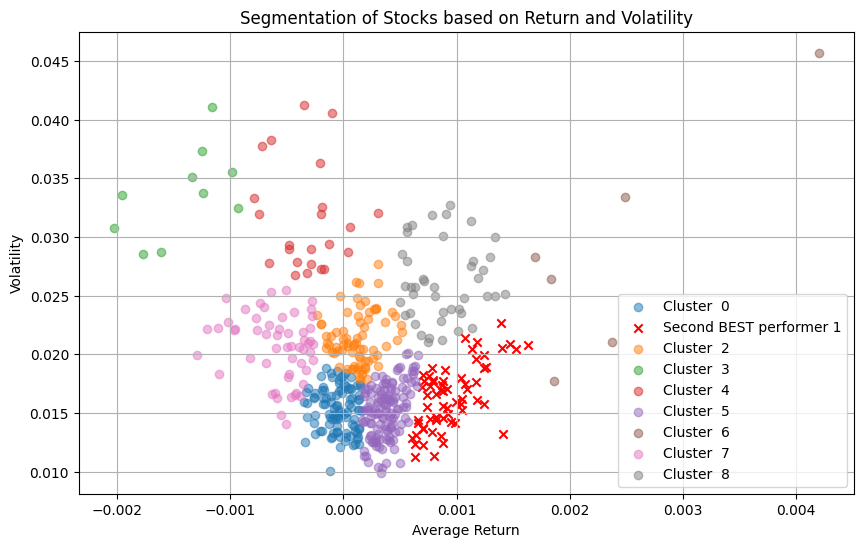

In [329]:
port.create_portfolio(Create_Kmeans_Portfolio_Second_Best)

In [330]:
port.create_portfolio(Create_More_Risky_Peformers_Portfolio)


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [331]:
port.create_portfolio(Create_Best_Peformers_Portfolio)

/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Se utilizó un algorirmo genérico para maximizar la signación de pesos para los stocks seleccionados por el modelo. A continución se demuestra que el algoritmo maximiza los retornos de forma eficiente dado que el portafolio seleccionado se encuentra en la frontera eficiente. Es decir que seleccionar cualquier otro portafolio, o los puntos azules, sería algo no óptimo

In [427]:
port.print_portfolio_returns()

Market
5.301555222550034


A continuación se presenta un ejemplo de como se medirán los resultados de los modelos.

Create_Kmeans_Portfolio_f10
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_f10 - Sum of Weighted Returns: -0.00
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
0    AFL        86.839996         87.129997    0.10  0.333949         0.000334
3   CBOE       180.259995        182.485001    0.12  1.234332         0.001481
4    COR       219.464996        218.735001    0.20 -0.332625        -0.000665
5     GD       296.704987        299.000000    0.08  0.773500         0.000619
7    MRK       130.994995        129.929901    0.27 -0.813080        -0.002195
8    RSG       186.244995        186.405594    0.23  0.086230         0.000198


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


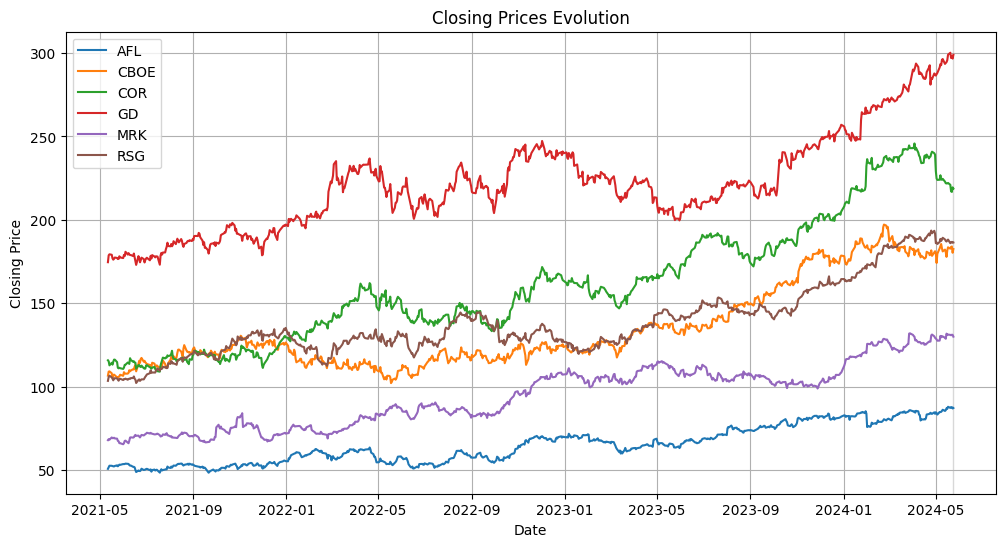

Create_Kmeans_Portfolio_Second_Best
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_Second_Best - Sum of Weighted Returns: 0.01
   Symbol  Avg Close Price  Last Close Price  Weight    Return  \
0    ACGL       101.731499        102.849998    0.10  1.099463   
3     APH       136.500000        137.710007    0.04  0.886452   
9    CBOE       180.259995        182.485001    0.01  1.234332   
11   COST       797.750000        815.909973    0.10  2.276399   
13    ETN       338.329987        345.019897    0.07  1.977333   
16   HUBB       401.119995        412.269989    0.01  2.779715   
18    IRM        79.264999         79.910004    0.03  0.813732   
19    MCK       558.289978        558.734985    0.35  0.079709   
21    MRK       130.994995        129.929901    0.15 -0.813080   
25    PGR       203.679993        204.389999    0.01  0.348589   
26   REGN       980.880005        990.784973    0.02  1.009804   
30   VRTX       450.970001        455.

/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


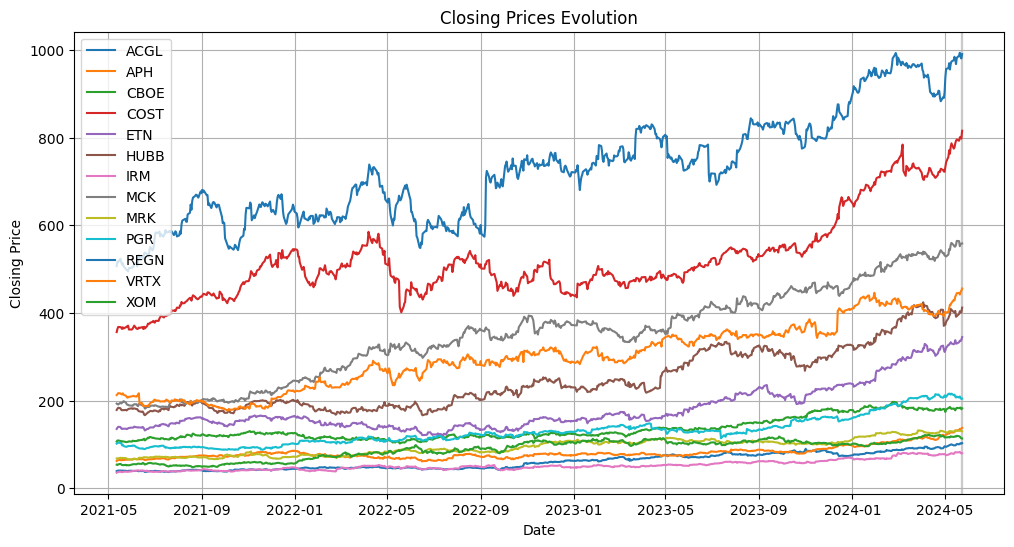

Create_Kmeans_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Kmeans_Portfolio - Sum of Weighted Returns: 0.03
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
0    LLY       807.780029        808.729980    0.47  0.117600         0.000553
1   NVDA      1039.860718       1042.301636    0.11  0.234735         0.000258
2    VST        96.199997        102.550003    0.42  6.600838         0.027724


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


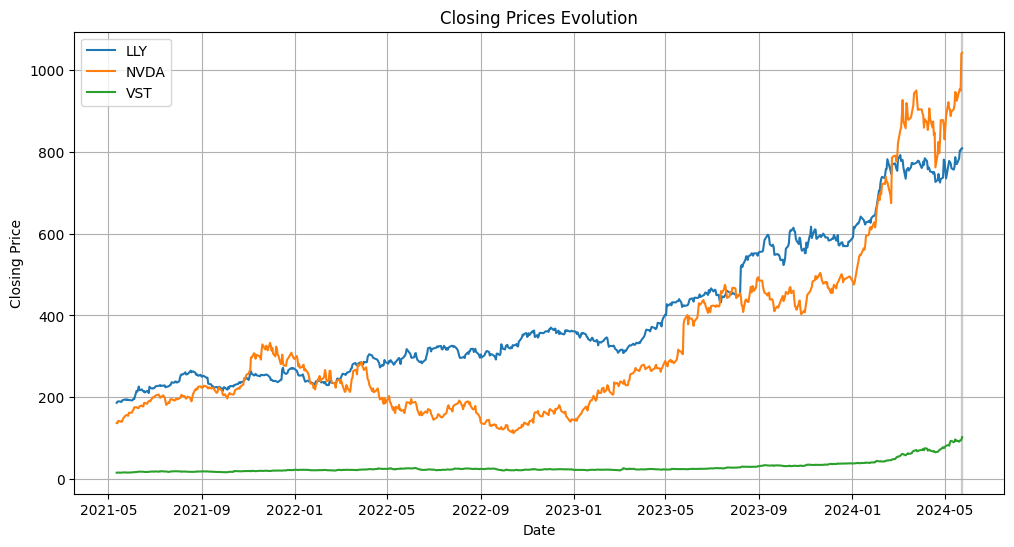

Create_Sentiment_Performance_Model
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Sentiment_Performance_Model - Sum of Weighted Returns: 0.04
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0   ANET       301.550995        307.385010    0.08   1.934669   
1   AVGO      1393.948853       1411.189941    0.27   1.236852   
2   BLDR       166.490005        170.009995    0.02   2.114234   
4   DECK       905.164978       1026.809937    0.11  13.438982   
5   FICO      1356.604980       1369.569946    0.11   0.955692   
7    NRG        81.320000         85.949997    0.23   5.693553   
8    PWR       277.529999        284.940002    0.19   2.669983   

   Weighted Return  
0         0.001548  
1         0.003340  
2         0.000423  
4         0.014783  
5         0.001051  
7         0.013095  
8         0.005073  


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


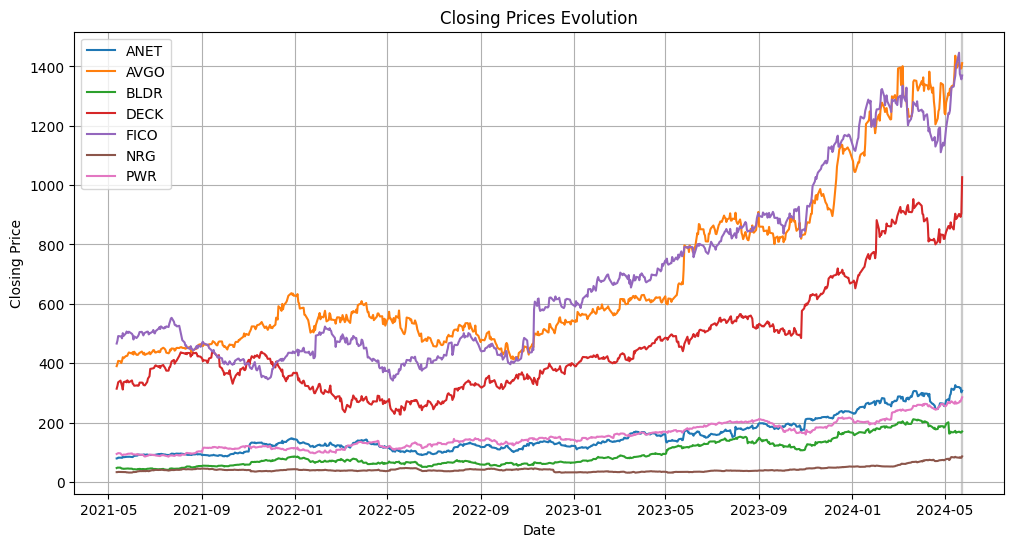

Create_Prophet_Portfolio_Second_Best
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Prophet_Portfolio_Second_Best - Sum of Weighted Returns: -0.01
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
1     CF        78.430000         77.445000    0.08 -1.255898        -0.001005
2   CTAS       694.780029        687.770020    0.89 -1.008954        -0.008980
6    NUE       171.580002        169.949997    0.03 -0.949997        -0.000285


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


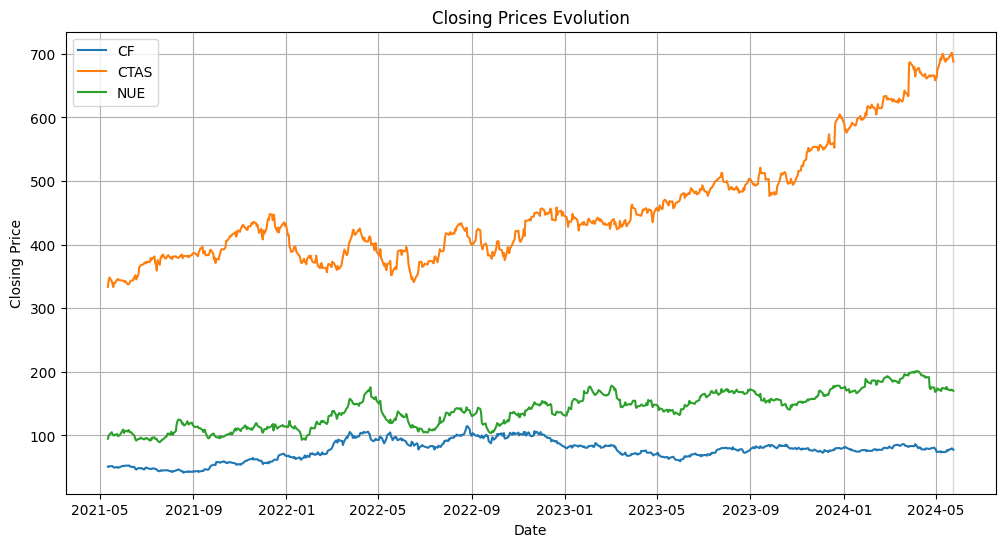

Create_More_Risky_Peformers_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_More_Risky_Peformers_Portfolio - Sum of Weighted Returns: 0.06
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0   SMCI       842.500000        869.679993    0.46   3.226112   
4   BLDR       166.490005        170.009995    0.18   2.114234   
5   FSLR       249.524994        276.692505    0.36  10.887691   

   Weighted Return  
0         0.014840  
4         0.003806  
5         0.039196  


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


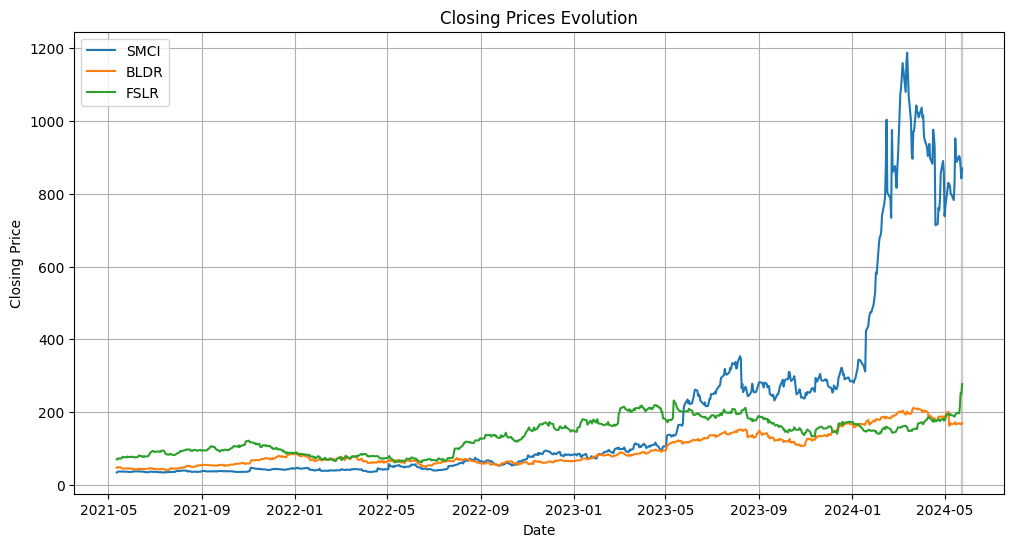

Create_Best_Peformers_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-24 00:00:00
Portfolio Name: Create_Best_Peformers_Portfolio - Sum of Weighted Returns: 0.08
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
1   FSLR       249.524994        276.692505    0.12  10.887691   
2    VST        96.199997        102.550003    0.65   6.600838   
5    HWM        82.525002         84.489998    0.08   2.381092   
6   DECK       905.164978       1026.809937    0.16  13.438982   

   Weighted Return  
1         0.013065  
2         0.042905  
5         0.001905  
6         0.021502  


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


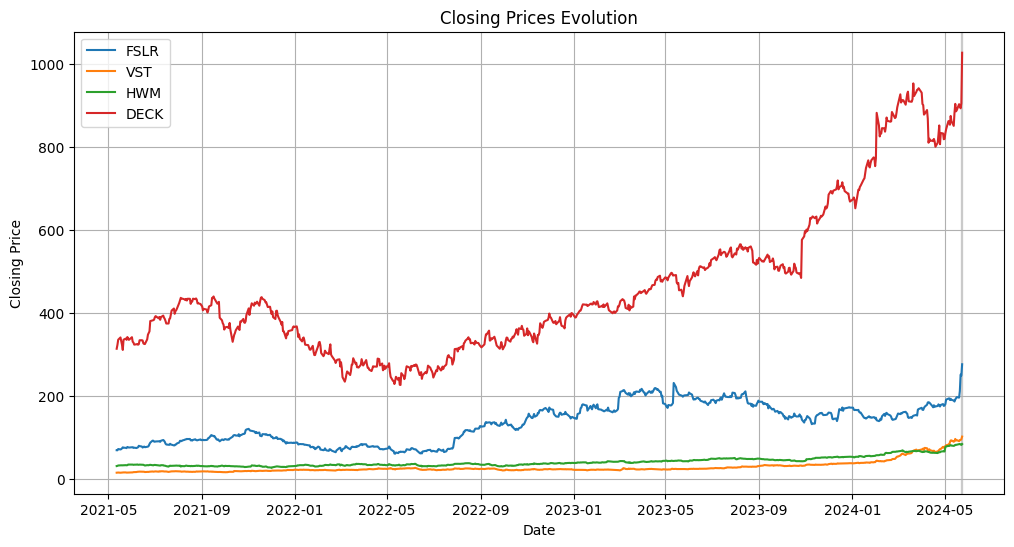

In [439]:
port.print_stock_return_details()

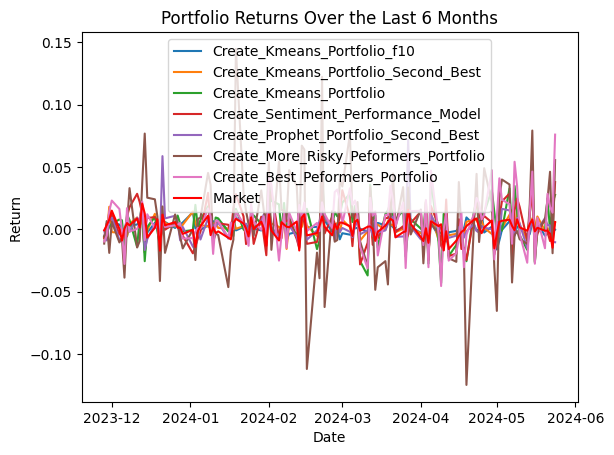

NameError: name 'valid_symbols' is not defined

In [438]:
port.plot_6_month_returns()

A continuacón se presenta una comparación de la relación riesgo y retnorno de varios portafolios creados por medio de los modelos, cada punto gris representa la misma relación para los 500 stocks que forman parte del mercdo, note que el de mayor riesgo obtiene un mahyor beneficioy que el portaolio segundo mejor tiene el riesgo más bajo del mercado, con el mismo rendimiento del modelo generado por medio de Prophet.

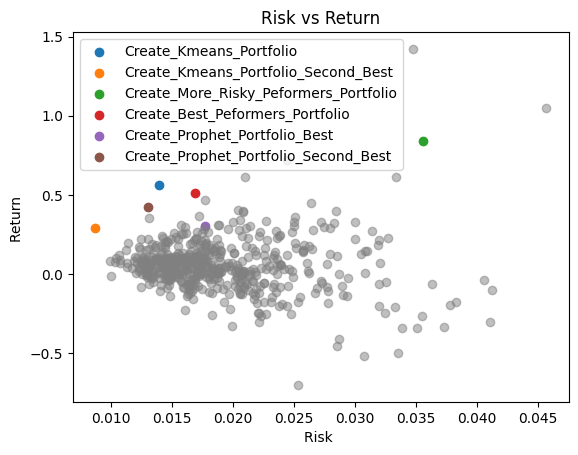

In [178]:
port.plot_risk_vs_return()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


A continuación se presentan los rendimientos de los modelos que se pondrán a prueba. Los modelos seleccionados tienen que tener un rendimiento mayor o igual al rendimiento del mercado, para que generen algún valor agregado.

0.0022335168592059608
0.0010794410045316138
0.0033454694279165423


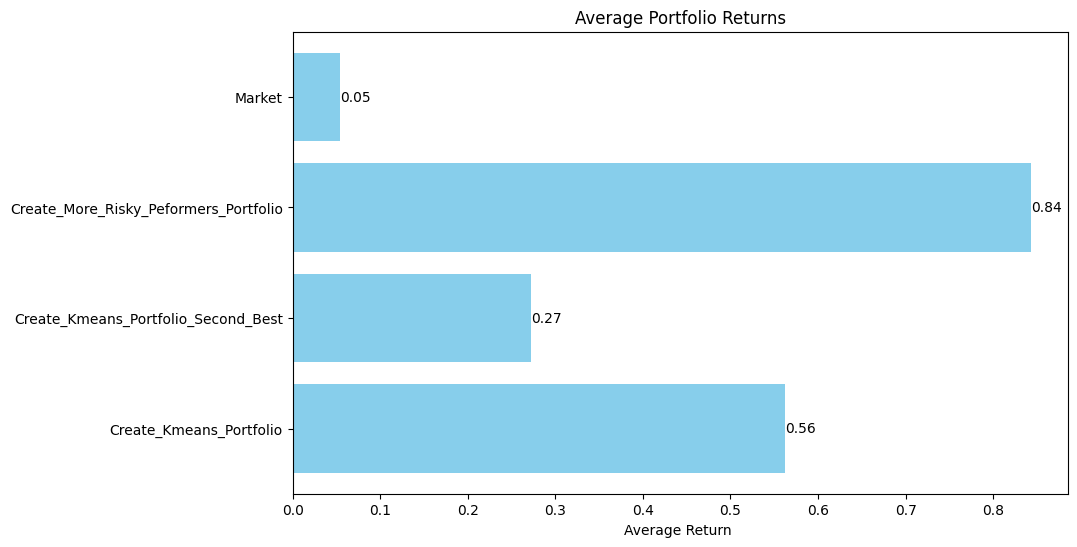

In [125]:
port.plot_avg_portfolio_returns()

A continuacuón se presenta una matriz que relaciona los modelos y los stocks seleccionados por cada modelo, es muy importante destacar que tres stocks catalogadas como altamente riesgosas han sido seleccionadas por el portafolio de K Medias, esto quiere decir que el portafolio de K medias es riesgoso, por lo tanto se recomenda utilizar los stocks seleccionados por el segundo segmento con mejores inicaores, Create_Kmeans_Portfolio_Second_Best

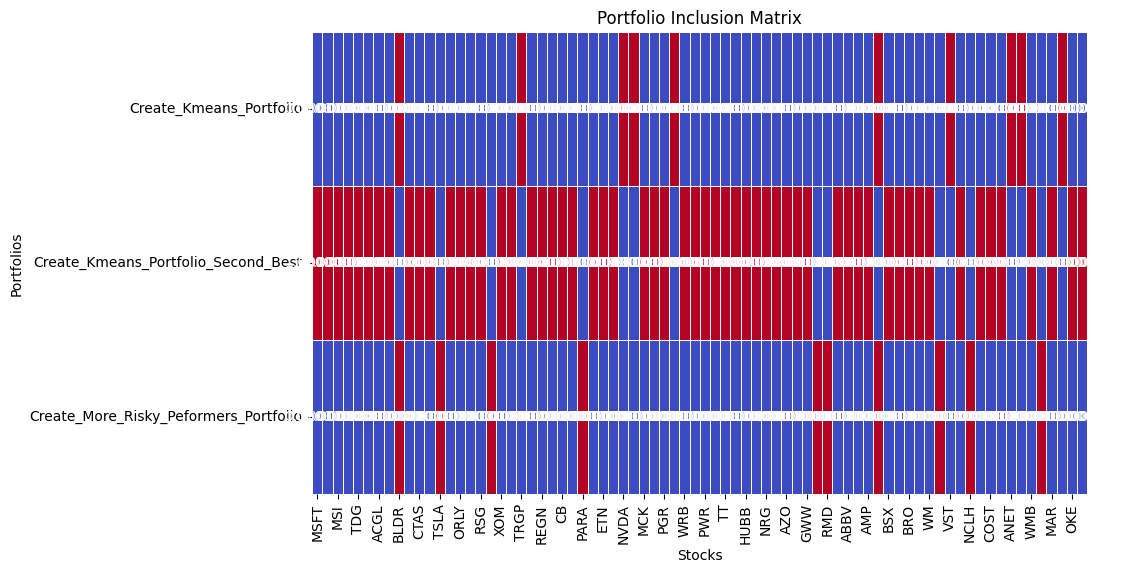

In [126]:
port.plot_portfolio_matrix()

In [176]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
def Create_Prophet_Portfolio_Second_Best(market_data):
# Assuming you have returns DataFrame and today's date is obtained
    today = datetime.today()
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

# Reset index and rename columns
    returns.reset_index(inplace=True)
    returns.columns = ['ds'] + returns.columns[1:].tolist()
    

# Create DataFrame to store projected returns
    future_date = today + pd.DateOffset(years=3)
    projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})

# Dictionary to store symbol-wise growth
    symbol_growth = {}

# Iterate over each symbol column
    for column in returns.columns[1:]:
    # Train Prophet model
        model = Prophet()
        prophet_df = returns[['ds', column]].rename(columns={column: 'y'})
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Extract projected returns
        projected_return_90_days = forecast.iloc[-1]['yhat']  # Return at the end of 90 days
        current_return = returns.iloc[-1][column]  # Return at the current date

    # Calculate growth
        growth = projected_return_90_days - current_return
        symbol_growth[column] = growth

# Sort symbols by growth and select the top ones
    selected_symbols = sorted(symbol_growth, key=symbol_growth.get, reverse=True)[11:20]  # Select top 10 symbols
    print("Symbols with the best growth according to the projections:")
    print(selected_symbols)
    retVal = Portfolio(market_data[selected_symbols],selected_symbols)
    for symbol in selected_symbols:
    # Train Prophet model
        model = Prophet()
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Plot historical and projected values
        plt.figure(figsize=(10, 6))
        plt.plot(returns['ds'], returns[symbol], label='Historical', color='blue')
        plt.plot(forecast['ds'], forecast['yhat'], label='Projected', color='orange')
        plt.title(f'{symbol} - Total Projected Growth: {symbol_growth[symbol]:.2%}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return retVal
def Create_Prophet_Portfolio_Best(market_data):
# Assuming you have returns DataFrame and today's date is obtained
    today = datetime.today()
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

# Reset index and rename columns
    returns.reset_index(inplace=True)
    returns.columns = ['ds'] + returns.columns[1:].tolist()
    

# Create DataFrame to store projected returns
    future_date = today + pd.DateOffset(years=3)
    projected_returns = pd.DataFrame({'ds': pd.date_range(start=today, end=future_date)})

# Dictionary to store symbol-wise growth
    symbol_growth = {}

# Iterate over each symbol column
    for column in returns.columns[1:]:
    # Train Prophet model
        model = Prophet()
        prophet_df = returns[['ds', column]].rename(columns={column: 'y'})
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Extract projected returns
        projected_return_90_days = forecast.iloc[-1]['yhat']  # Return at the end of 90 days
        current_return = returns.iloc[-1][column]  # Return at the current date

        growth = projected_return_90_days - current_return
        symbol_growth[column] = growth


    selected_symbols = sorted(symbol_growth, key=symbol_growth.get, reverse=True)[:10]  # Select top 10 symbols
    print("Symbols with the best growth according to the projections:")
    print(selected_symbols)
    retVal = Portfolio(market_data[selected_symbols],selected_symbols)
    for symbol in selected_symbols:
    # Train Prophet model
        model = Prophet()
        model.fit(prophet_df)

    # Make future projections
        future = model.make_future_dataframe(periods=90)  # 90 days
        forecast = model.predict(future)

    # Plot historical and projected values
        plt.figure(figsize=(10, 6))
        plt.plot(returns['ds'], returns[symbol], label='Historical', color='blue')
        plt.plot(forecast['ds'], forecast['yhat'], label='Projected', color='orange')
        plt.title(f'{symbol} - Total Projected Growth: {symbol_growth[symbol]:.2%}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    return retVal

A continuación se presenta el portafolio seleccionado utilizando un modelo de proyección en series de tiempo, según los resultado, este modelo no se adapta tanto a la necesidad dado que es altamente influenciado por datos atípicos o eventos aislados que sucedieron en algún momento en el tiempo y que no necesariamente están asociado a estacionalidad.

10:56:27 - cmdstanpy - INFO - Chain [1] start processing
10:56:28 - cmdstanpy - INFO - Chain [1] done processing
10:56:28 - cmdstanpy - INFO - Chain [1] start processing
10:56:28 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:29 - cmdstanpy - INFO - Chain [1] start processing
10:56:29 - cmdstanpy - INFO - Chain [1] done processing
10:56:30 - cmdstanpy - INFO - Chain [1] start processing
10:56:30 - cmdstanpy - INFO - Chain [1] done processing
10:56:30 - cmdstanpy - INFO - Chain [1] start processing
10:56:30 - cmdstanpy - INFO - Chain [1] done processing
10:56:31 - cmdstanpy - INFO - Chain [1] start processing
10:56:31 - cmdstanpy - INFO - Chain [1] done processing
10:56:31 - cmdstanpy - INFO - Chain [1] start processing
10:56:31 - cmdstanpy - INFO - Chain [1]

Symbols with the best growth according to the projections:
['AKAM', 'PODD', 'MRNA', 'ALGN', 'IP', 'CE', 'GE', 'ALB', 'CZR', 'AXON']


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
10:59:47 - cmdstanpy - INFO - Chain [1] start processing
10:59:47 - cmdstanpy - INFO - Chain [1] done processing


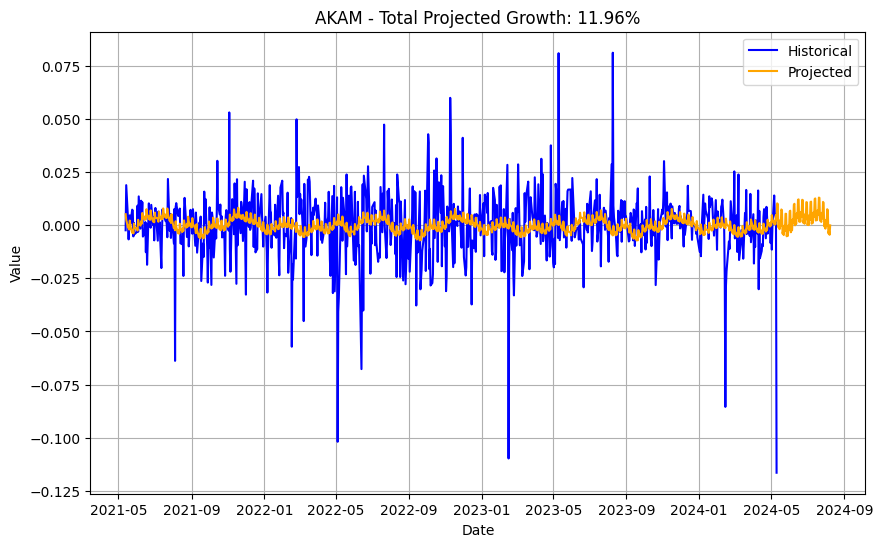

10:59:48 - cmdstanpy - INFO - Chain [1] start processing
10:59:48 - cmdstanpy - INFO - Chain [1] done processing


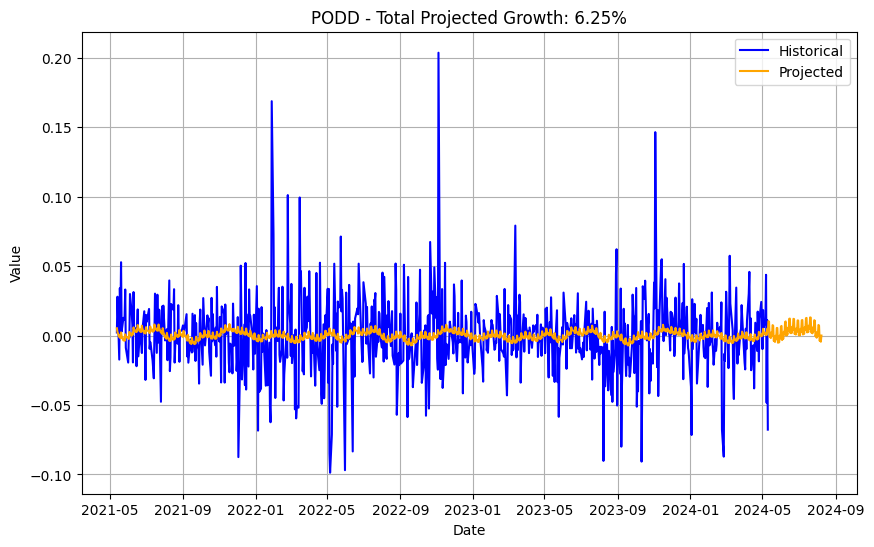

10:59:48 - cmdstanpy - INFO - Chain [1] start processing
10:59:48 - cmdstanpy - INFO - Chain [1] done processing


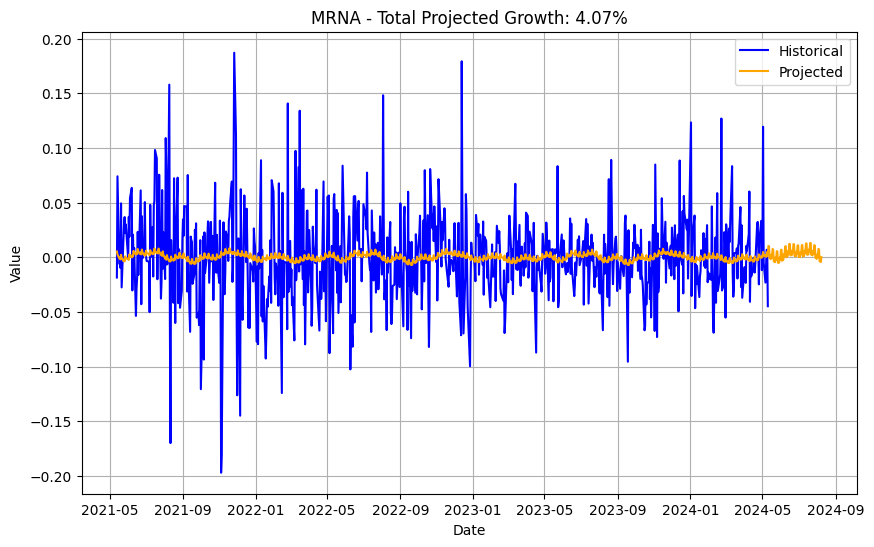

10:59:49 - cmdstanpy - INFO - Chain [1] start processing
10:59:49 - cmdstanpy - INFO - Chain [1] done processing


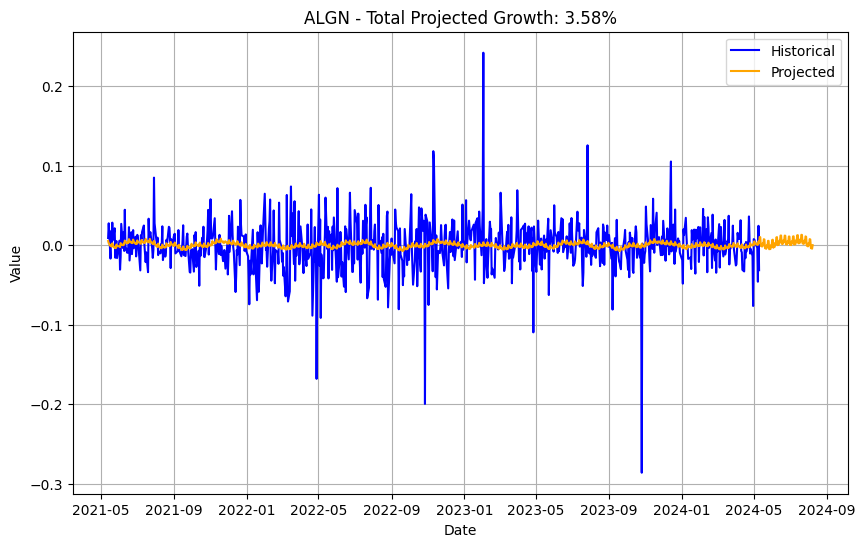

10:59:50 - cmdstanpy - INFO - Chain [1] start processing
10:59:50 - cmdstanpy - INFO - Chain [1] done processing


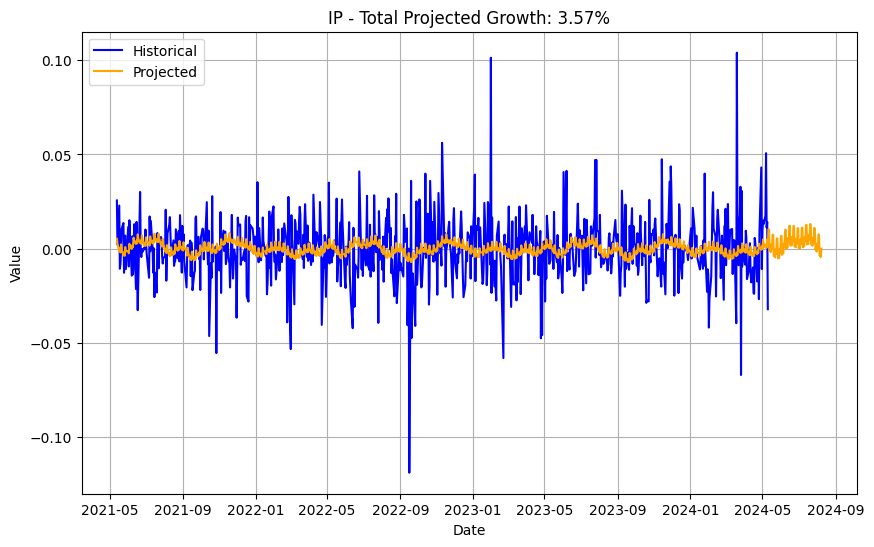

10:59:51 - cmdstanpy - INFO - Chain [1] start processing
10:59:51 - cmdstanpy - INFO - Chain [1] done processing


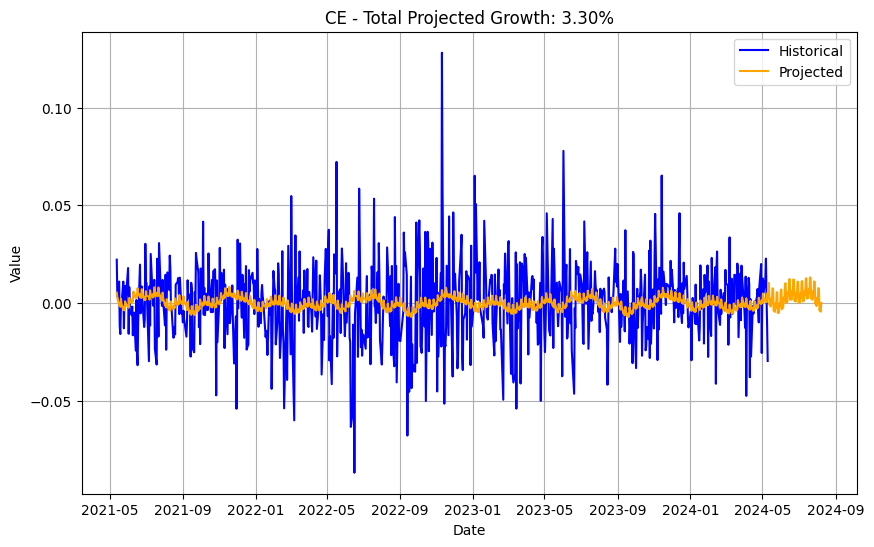

10:59:51 - cmdstanpy - INFO - Chain [1] start processing
10:59:51 - cmdstanpy - INFO - Chain [1] done processing


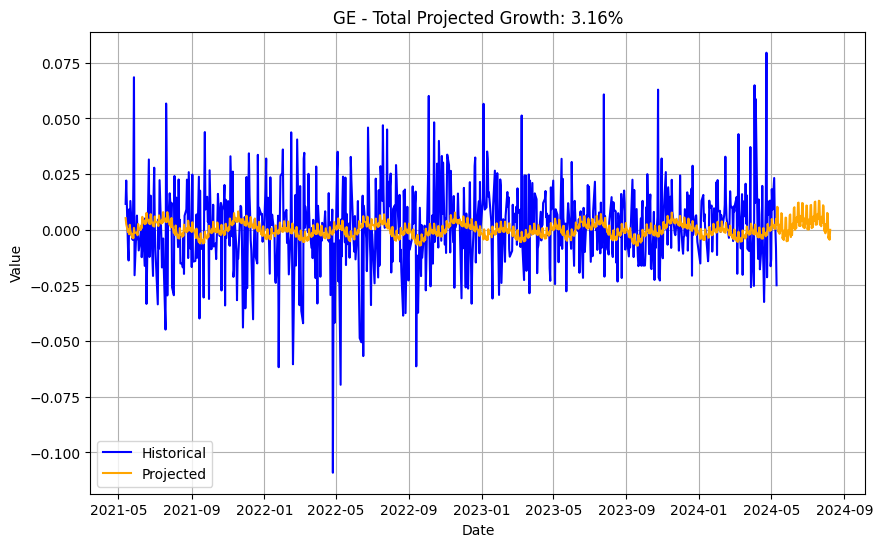

10:59:52 - cmdstanpy - INFO - Chain [1] start processing
10:59:52 - cmdstanpy - INFO - Chain [1] done processing


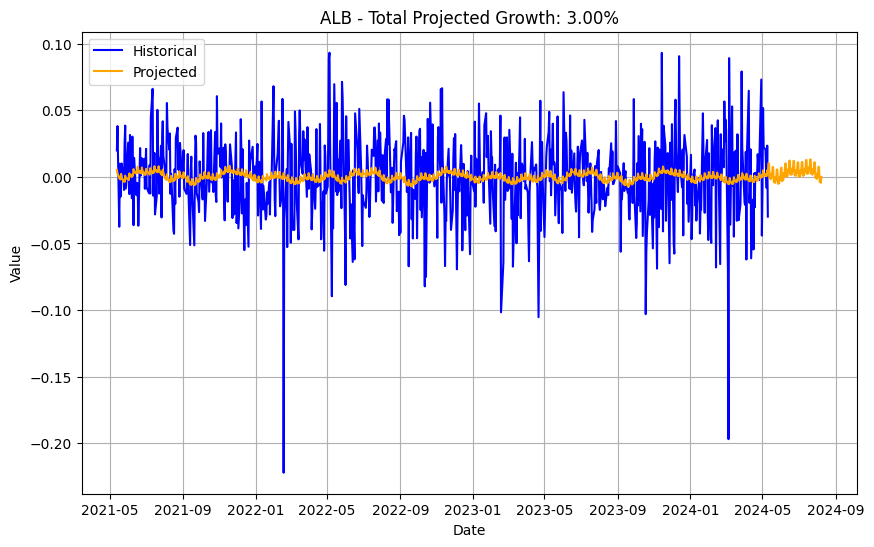

10:59:53 - cmdstanpy - INFO - Chain [1] start processing
10:59:53 - cmdstanpy - INFO - Chain [1] done processing


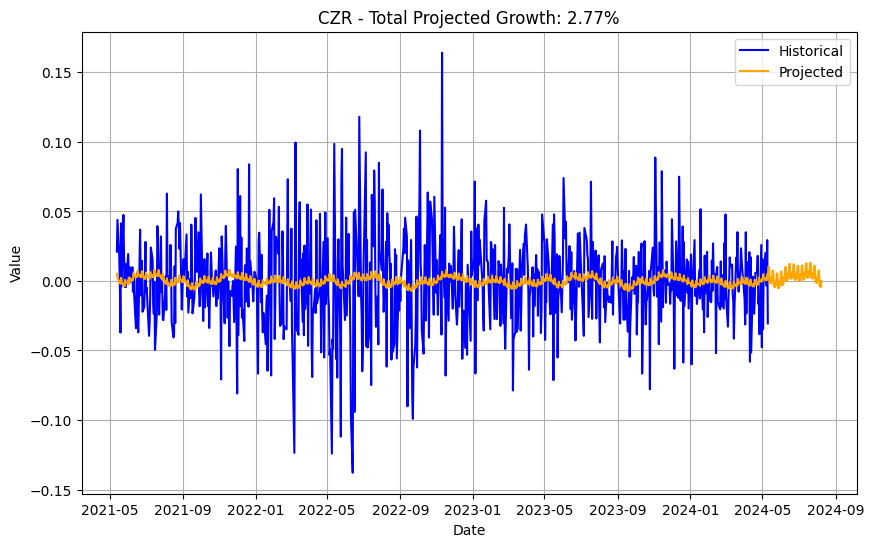

10:59:53 - cmdstanpy - INFO - Chain [1] start processing
10:59:53 - cmdstanpy - INFO - Chain [1] done processing


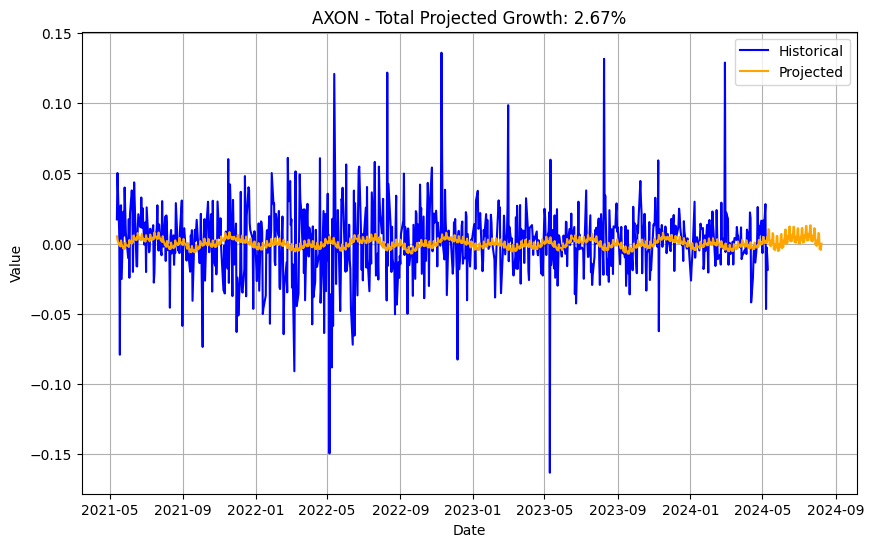

In [334]:
port.create_portfolio(Create_Prophet_Portfolio_Best)

10:59:54 - cmdstanpy - INFO - Chain [1] start processing
10:59:54 - cmdstanpy - INFO - Chain [1] done processing
10:59:55 - cmdstanpy - INFO - Chain [1] start processing
10:59:55 - cmdstanpy - INFO - Chain [1] done processing
10:59:55 - cmdstanpy - INFO - Chain [1] start processing
10:59:55 - cmdstanpy - INFO - Chain [1] done processing
10:59:56 - cmdstanpy - INFO - Chain [1] start processing
10:59:56 - cmdstanpy - INFO - Chain [1] done processing
10:59:56 - cmdstanpy - INFO - Chain [1] start processing
10:59:56 - cmdstanpy - INFO - Chain [1] done processing
10:59:56 - cmdstanpy - INFO - Chain [1] start processing
10:59:56 - cmdstanpy - INFO - Chain [1] done processing
10:59:57 - cmdstanpy - INFO - Chain [1] start processing
10:59:57 - cmdstanpy - INFO - Chain [1] done processing
10:59:57 - cmdstanpy - INFO - Chain [1] start processing
10:59:57 - cmdstanpy - INFO - Chain [1] done processing
10:59:58 - cmdstanpy - INFO - Chain [1] start processing
10:59:58 - cmdstanpy - INFO - Chain [1]

Symbols with the best growth according to the projections:
['BBWI', 'CME', 'MPC', 'GPN', 'PYPL', 'EQT', 'FSLR', 'EQIX', 'LLY']


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
11:03:20 - cmdstanpy - INFO - Chain [1] start processing
11:03:20 - cmdstanpy - INFO - Chain [1] done processing


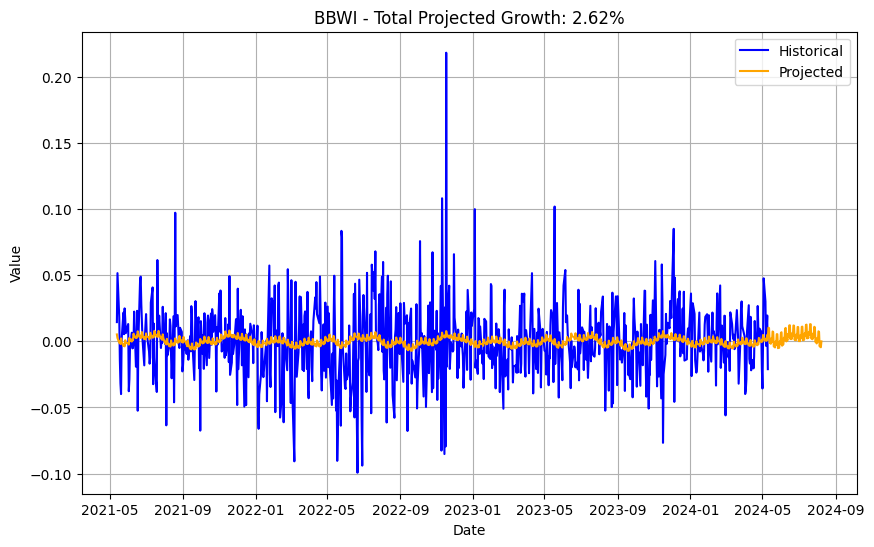

11:03:21 - cmdstanpy - INFO - Chain [1] start processing
11:03:21 - cmdstanpy - INFO - Chain [1] done processing


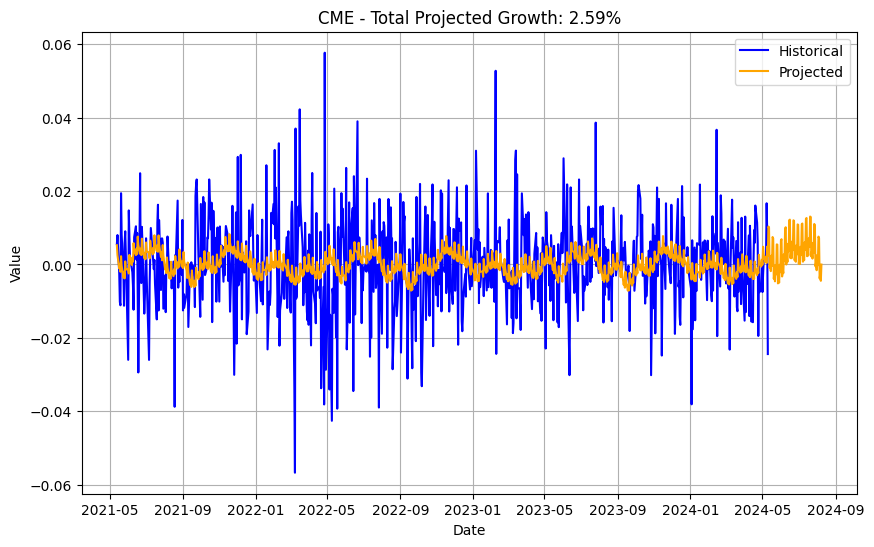

11:03:22 - cmdstanpy - INFO - Chain [1] start processing
11:03:22 - cmdstanpy - INFO - Chain [1] done processing


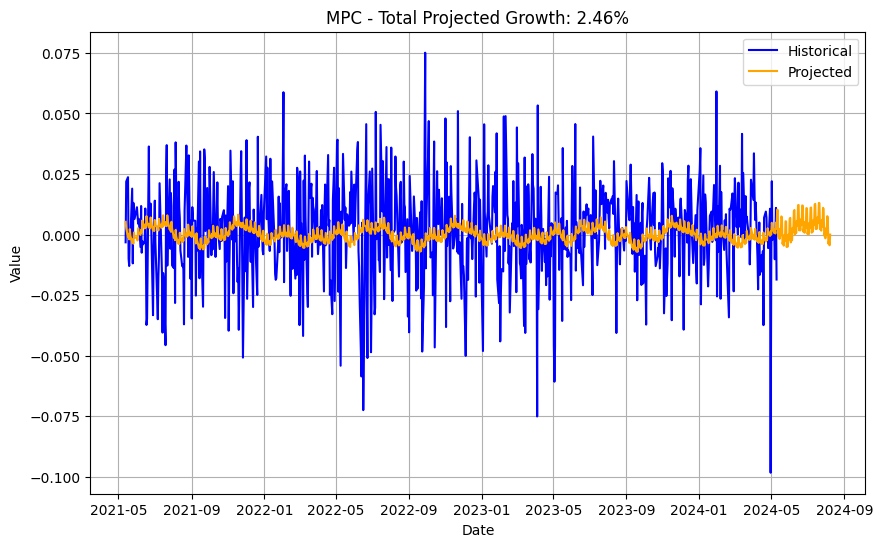

11:03:23 - cmdstanpy - INFO - Chain [1] start processing
11:03:23 - cmdstanpy - INFO - Chain [1] done processing


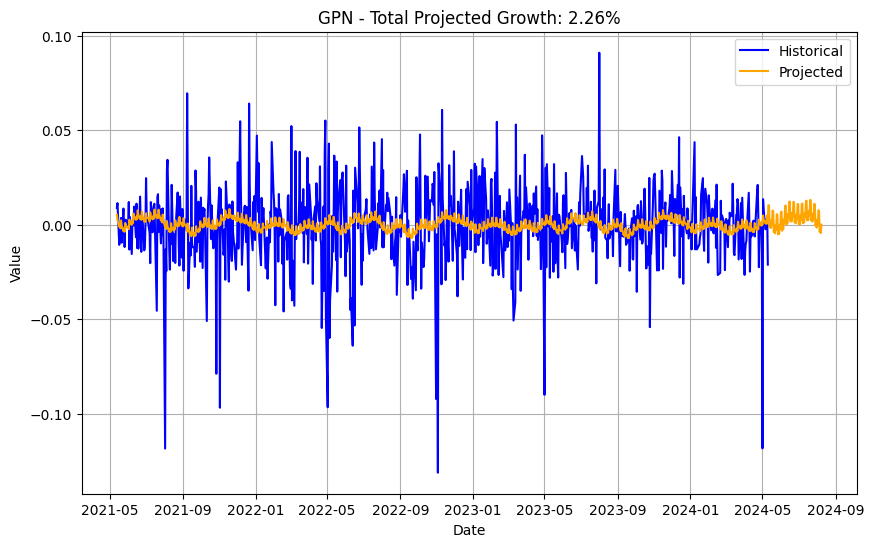

11:03:23 - cmdstanpy - INFO - Chain [1] start processing
11:03:23 - cmdstanpy - INFO - Chain [1] done processing


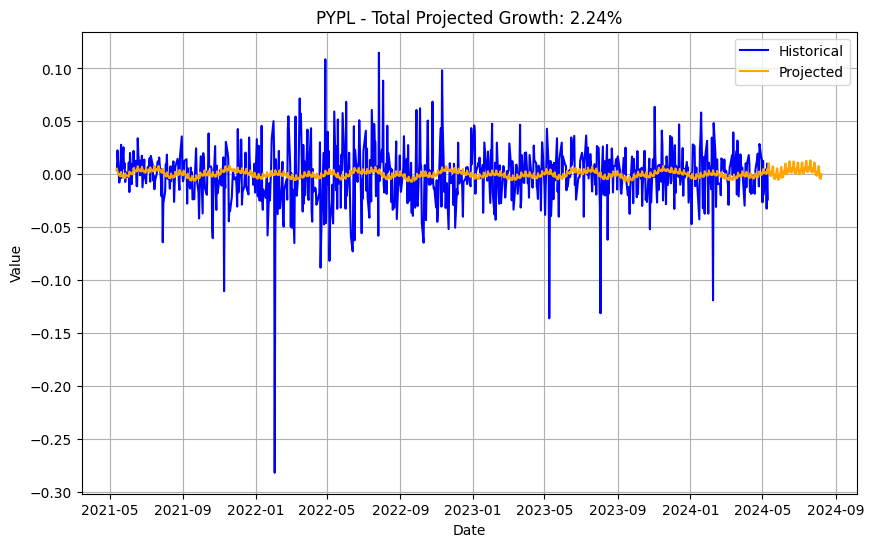

11:03:24 - cmdstanpy - INFO - Chain [1] start processing
11:03:24 - cmdstanpy - INFO - Chain [1] done processing


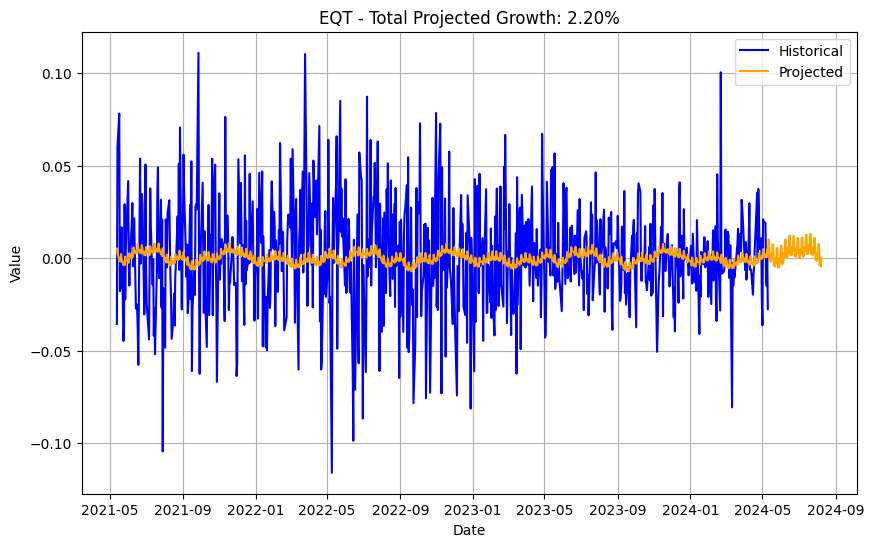

11:03:25 - cmdstanpy - INFO - Chain [1] start processing
11:03:25 - cmdstanpy - INFO - Chain [1] done processing


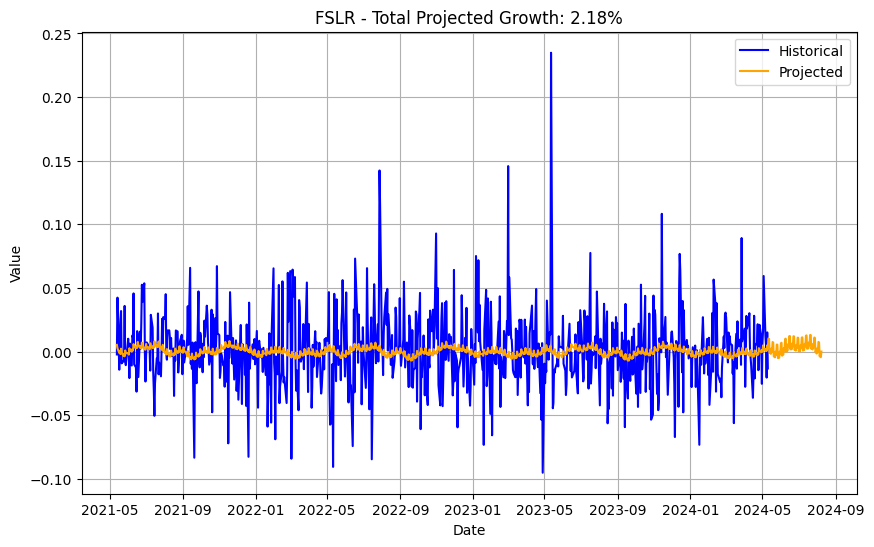

11:03:25 - cmdstanpy - INFO - Chain [1] start processing
11:03:25 - cmdstanpy - INFO - Chain [1] done processing


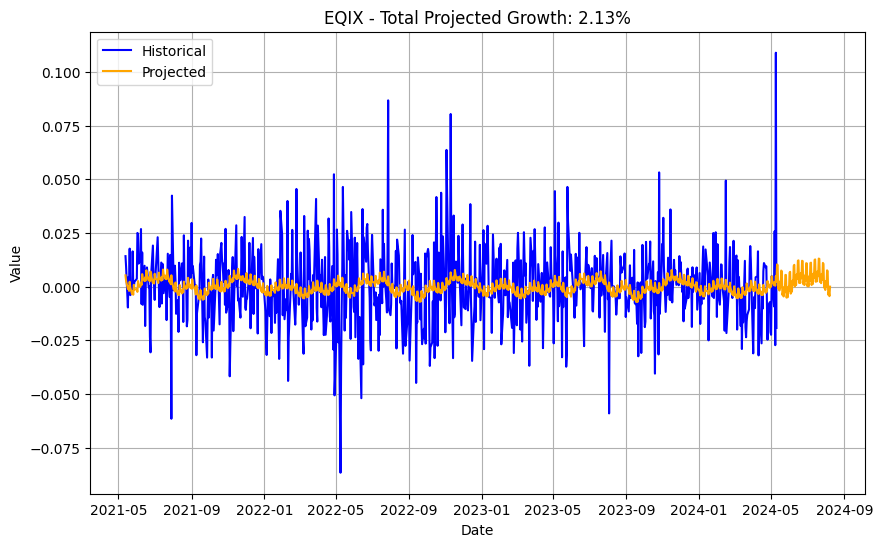

11:03:26 - cmdstanpy - INFO - Chain [1] start processing
11:03:26 - cmdstanpy - INFO - Chain [1] done processing


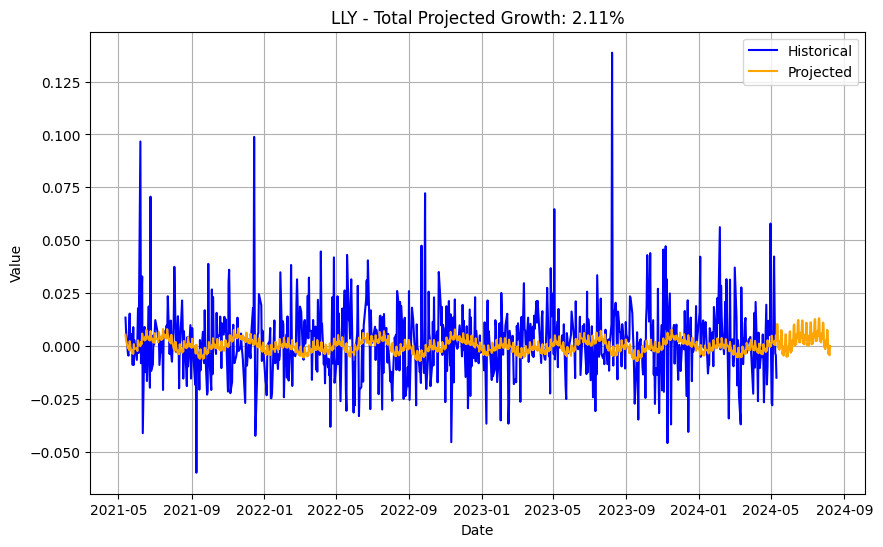

In [335]:
port.create_portfolio(Create_Prophet_Portfolio_Second_Best)

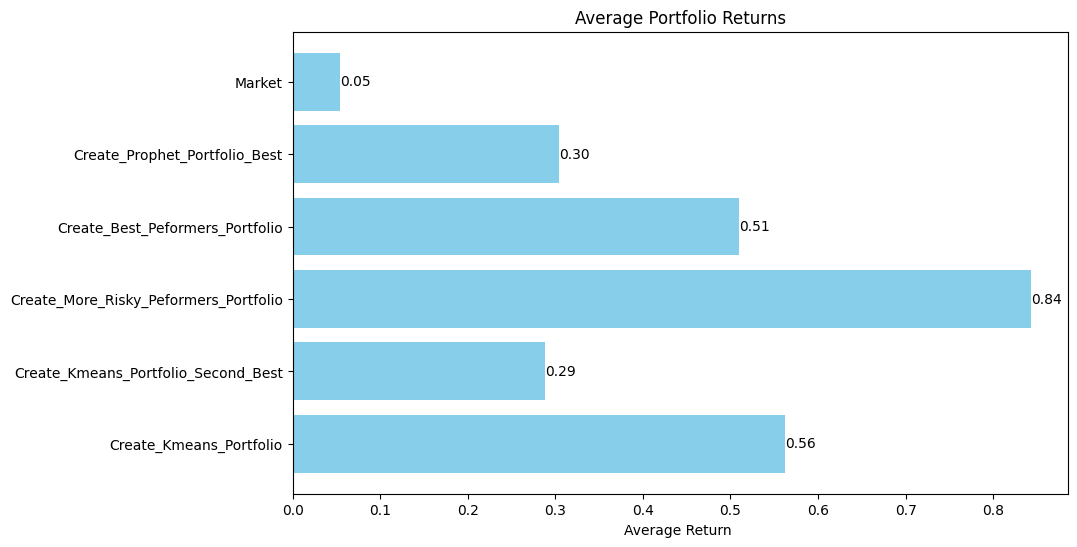

In [174]:
port.plot_avg_portfolio_returns()


Create_Kmeans_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Kmeans_Portfolio - Sum of Weighted Returns: 0.08
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0   ANET       256.559998        314.029999    0.03  22.400219   
2    LLY       781.099976        760.000000    0.44  -2.701316   
3   NVDA       864.020020        898.780029    0.01   4.023056   
4   SMCI       858.799988        798.500000    0.12  -7.021424   
5    VST        75.839996         93.419998    0.41  23.180383   

   Weighted Return  
0         0.006720  
2        -0.011886  
3         0.000402  
4        -0.008426  
5         0.095040  


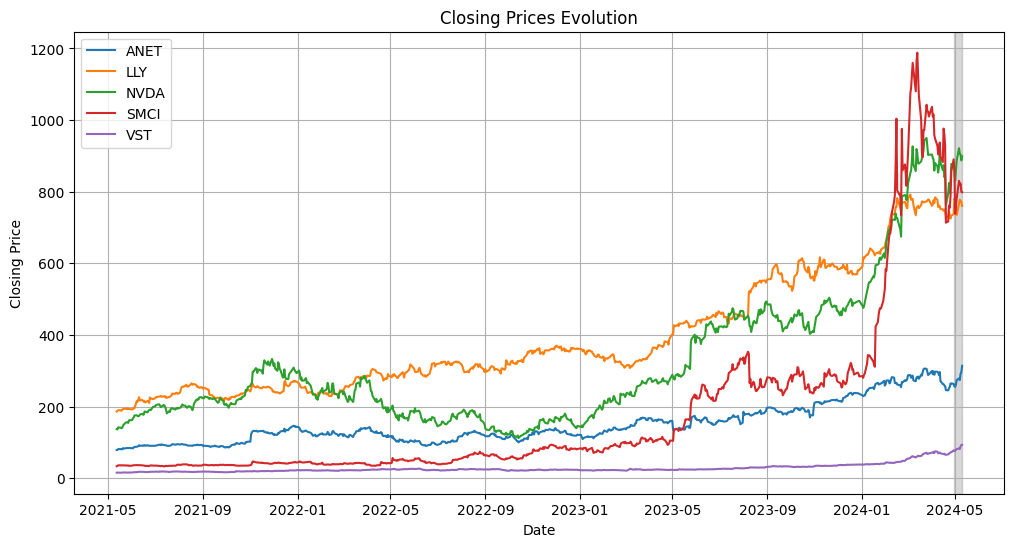

Create_Kmeans_Portfolio_Second_Best
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_Second_Best - Sum of Weighted Returns: 0.04
   Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0    ABBV       162.639999        160.750000    0.01  -1.162075   
1    ACGL        93.540001        100.050003    0.04   6.959592   
7    AVGO      1300.270020       1332.800049    0.11   2.501790   
13   CBOE       181.149994        181.059998    0.03  -0.049681   
15    CMG      3159.600098       3239.229980    0.03   2.520252   
18   COST       722.900024        787.190002    0.01   8.893343   
23   FICO      1133.329956       1328.609985    0.04  17.230642   
25     GE       161.820007        163.380005    0.01   0.964033   
30    HWM        66.750000         80.870003    0.01  21.153562   
32    IRM        77.519997         79.769997    0.01   2.902477   
35    MCK       537.210022        559.909973    0.32   4.225526   
38    MPC       181.720001

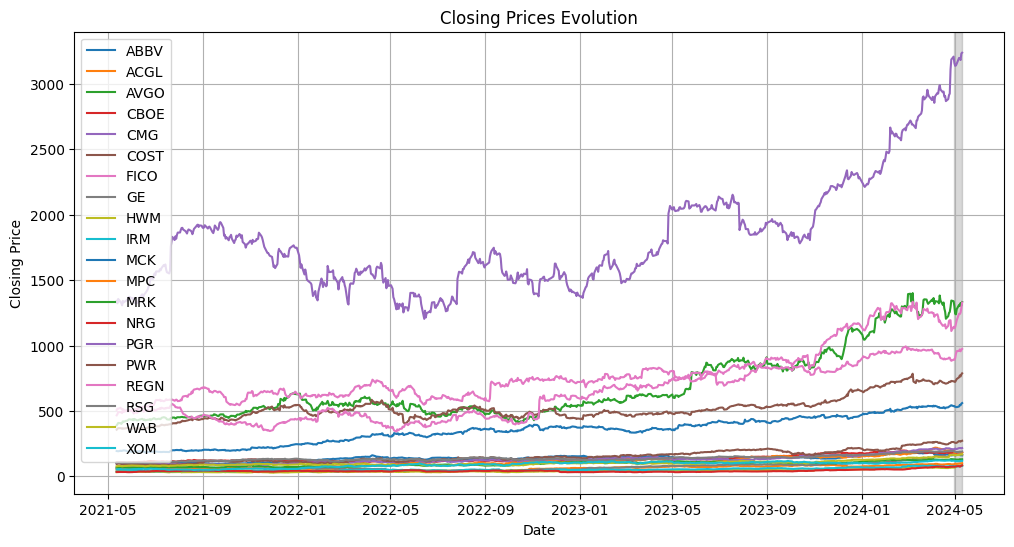

Create_More_Risky_Peformers_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_More_Risky_Peformers_Portfolio - Sum of Weighted Returns: -0.08
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
1   SMCI       858.799988        798.500000    0.64 -7.021424        -0.044937
4   BLDR       182.820007        166.960007    0.36 -8.675200        -0.031231


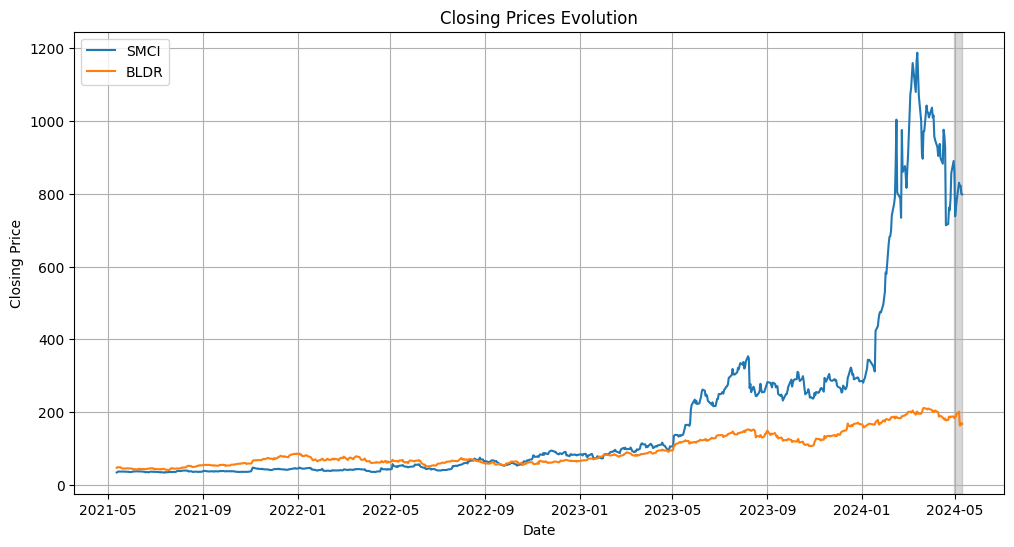

Create_Best_Peformers_Portfolio
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Best_Peformers_Portfolio - Sum of Weighted Returns: 0.16
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0    VST        75.839996         93.419998    0.66  23.180383   
4     GE       161.820007        163.380005    0.18   0.964033   
5    WAB       161.080002        168.339996    0.16   4.507074   

   Weighted Return  
0         0.152991  
4         0.001735  
5         0.007211  


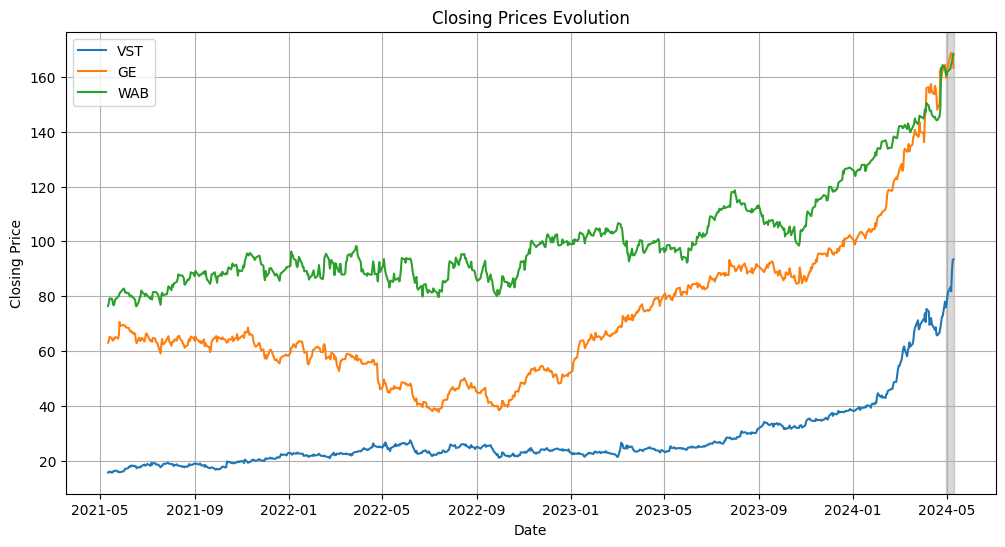

Create_Prophet_Portfolio_Best
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Prophet_Portfolio_Best - Sum of Weighted Returns: -0.00
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
6     GE       161.820007        163.380005    0.77  0.964033         0.007423
9   AXON       313.660004        303.429993    0.23 -3.261497        -0.007501


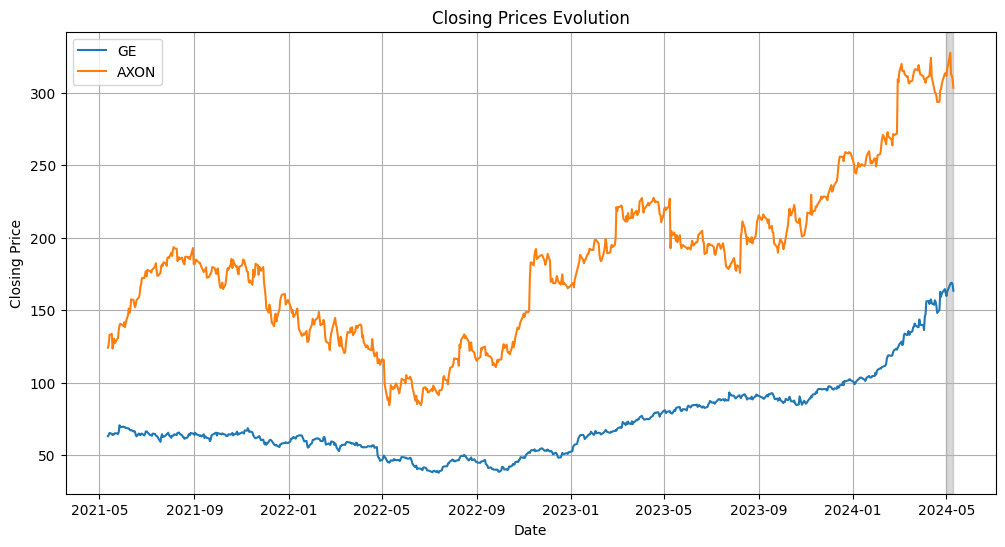

Create_Prophet_Portfolio_Second_Best
from:
2024-04-30 00:00:00
to:
2024-05-10 00:00:00
Portfolio Name: Create_Prophet_Portfolio_Second_Best - Sum of Weighted Returns: -0.01
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
2    MPC       181.720001        179.559998    0.32 -1.188644        -0.003804
6   FSLR       176.300003        191.050003    0.09  8.366421         0.007530
8    LLY       781.099976        760.000000    0.59 -2.701316        -0.015938


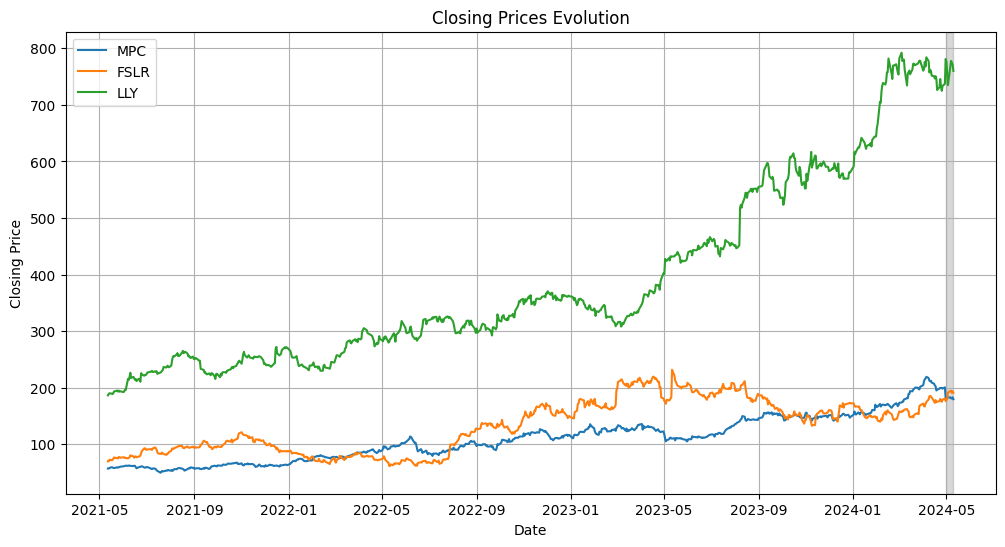

In [336]:
port.print_stock_return_details()

Se estará evaluando también un portafolio de invrersión con base a los resultados de la relación entre el análisis de sentimiento de las noticias y el cambio en rendimientos, esto se etará evaluando en la fase de modelos alternativos.

A continuación se presentan las pruebas asociados a modelos de machine learning de regresión, arboles de decisión y redes neuronales para poder predecir compotaminetos basados en el análisis de sentimiento. Se concluyó que el modelo más adecuado para este caso de uso es el de random forest.

In [383]:
df0 = pd.read_csv('NewsRegisterSentiment2021.csv')
df1 = pd.read_csv('NewsRegisterSentiment2022.csv')
df2 = pd.read_csv('NewsRegisterSentiment2023.csv')
df3 = pd.read_csv('NewsRegisterSentiment2023.csv')
df0['Date'] = pd.to_datetime(df0['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
max_date = df3['Date'].max()
thirty_days_before_max = max_date - timedelta(days=30)
df_fit = df3[df3['Date'] <= thirty_days_before_max]

df4 = df3[df3['Date'] > thirty_days_before_max]

df_union = pd.concat([df0,df1, df2,df_excluding_last_30_days])

/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1672276147.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0['Date'] = pd.to_datetime(df0['Date'])
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1672276147.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [384]:
df_union

Date       MMM       AOS       ABT      ABBV       ACN      ADBE  \
0   2021-01-01  0.845974  0.000000 -3.528527  0.000000  0.000000 -1.865247   
1   2021-02-01  0.641352  0.000000 -0.744283  0.000000 -0.984547  0.001489   
2   2021-03-01 -4.969623  0.000000 -2.634179 -3.789056 -1.981866 -3.894657   
3   2021-04-01  0.878635  0.000000  2.411639 -3.788457  0.967256 -3.924308   
4   2021-05-01  2.635330  0.999395  0.443678  0.013348  0.334767 -4.920545   
..         ...       ...       ...       ...       ...       ...       ...   
330 2023-11-27  1.000295  0.008983  4.966188 -0.791769  1.971968 -1.017181   
331 2023-11-28  1.995124  1.452576  1.750908  0.873269  3.994068  0.977288   
332 2023-11-29 -0.996827  3.446355 -0.200168 -0.200323  2.033493 -3.477138   
333 2023-11-30 -1.945331  3.994072  0.485707 -1.479067  1.981836 -0.008596   
334 2023-12-01 -1.947542  3.896835  0.438852  2.575583  4.909357  0.832066   

          AMD       AES       AFL  ...       WMB       WTW       GWW  \
0    1.085387  0.000000  0.000000  ...  2.092832 -0.986742  0.000000   
1   -0.960088  0.000000  0.000000  ...  1.813555  0.000000  0.000000   
2   -2.964449  1.010417  0.000000  ...  1.088539  0.980713  0.000000   
3    0.993459  0.451147  0.000000  ...  0.024533  3.135322  0.000000   
4   -1.983299 -0.009824  0.000000  ... -0.777875  1.168361  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
330 -1.462756 -3.819082  2.187180  ... -0.710767  1.012488  1.809349   
331  2.499087 -3.961415  1.077723  ...  0.992274  0.814912  0.998616   
332  2.971828 -3.963846  1.191404  ...  4.969146  0.029149  2.997373   
333  1.851329  1.009030 -0.672504  ...  1.010643  3.730601  3.938318   
334 -1.685811  1.981243 -0.984179  ...  0.000000  0.000000  0.000000   

         WYNN       XEL       XYL       YUM      ZBRA       ZBH       ZTS  
0   -0.001319 -0.986899  0.000000 -0.059251  0.000000  0.000000  0.000000  
1   -0.001319 -0.986899  0.000000  1.885499 -0.989463  0.000000  0.000000  
2    0.974045 -3.021186  0.996460 -1.076928 -1.967770  1.921353  0.000000  
3   -1.091473 -3.021186  2.700364 -0.981213 -0.978307  4.625481  0.000000  
4   -0.941988 -2.265129  1.703904 -0.969480  0.000000  2.704129 -0.981413  
..        ...       ...       ...       ...       ...       ...       ...  
330  1.032412 -1.353036 -0.929030  0.421124  3.021072 -1.768073 -0.870190  
331  0.049798  1.951549 -0.929030 -0.577358  3.080216 -1.700203  0.994627  
332  0.054350  4.745365  0.000000 -1.241813  3.964449  1.033121  0.994627  
333  0.055357  2.986844  0.000000  1.752993  1.052100  0.751434  0.997826  
334  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[1430 rows x 504 columns]

In [354]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

def Create_Sentiment_Performance_Model( market_data):
    # Calculate the average return of the previous 30 days and the next 30 days for each stock
    df0 = pd.read_csv('NewsRegisterSentiment2021.csv')
    df1 = pd.read_csv('NewsRegisterSentiment2022.csv')
    df2 = pd.read_csv('NewsRegisterSentiment2023.csv')
    df3 = pd.read_csv('NewsRegisterSentiment2023.csv')
    df0['Date'] = pd.to_datetime(df0['Date'])
    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])
    df3['Date'] = pd.to_datetime(df3['Date'])
    max_date = df3['Date'].max()
    thirty_days_before_max = max_date - timedelta(days=30)
    df4 = df3[df3['Date'] <= thirty_days_before_max]

    df_fit = df3[df3['Date'] > thirty_days_before_max]

    df_union = pd.concat([df0,df1, df2,df4])
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

    prev_30d_avg_return = returns.rolling(30).mean().shift(1)
    next_30d_avg_return = returns.shift(-30).rolling(30).mean()

    # Unpivot or "melt" the returns DataFrames
    prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
    next_returns_melted = next_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='next_30d_avg_return')

    df_union['Date'] = pd.to_datetime(df_union['Date'])
    prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
    next_returns_melted['Date'] = pd.to_datetime(next_returns_melted['Date'])

    # Merge the melted returns DataFrames with the sentiment DataFrame
    df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, next_returns_melted, on=['Date', 'stock'], how='inner')

    # Drop rows with NaN values
    df = df.dropna()

    # Prepare the features (X) and the target (y)
    X = df[['value', 'prev_30d_avg_return']]
    y = df['next_30d_avg_return']

    # Fit a Lasso regression model
    model = Lasso(alpha=0.1)
    model.fit(X, y)

    # Print the coefficients
    print('Intercept:', model.intercept_)
    print('Coefficients:', model.coef_)

    return model

Create_Sentiment_Performance_Model( port.market_data)


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1540738120.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_union['Date'] = pd.to_datetime(df_union['Date'])


Intercept: 0.0003136410786756385
Coefficients: [ 0. -0.]


Lasso(alpha=0.1)

In [355]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def Create_Sentiment_Performance_Model(df_union, market_data):
    # Calculate the average return of the previous 30 days and the next 30 days for each stock
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))

    prev_30d_avg_return = returns.rolling(30).mean().shift(1)
    next_30d_avg_return = returns.shift(-30).rolling(30).mean()

    # Unpivot or "melt" the returns DataFrames
    prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
    next_returns_melted = next_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='next_30d_avg_return')

    # Ensure 'Date' is datetime in all DataFrames
    df_union['Date'] = pd.to_datetime(df_union['Date'])
    prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
    next_returns_melted['Date'] = pd.to_datetime(next_returns_melted['Date'])

    # Merge the melted returns DataFrames with the sentiment DataFrame
    df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, next_returns_melted, on=['Date', 'stock'], how='inner')

    # Drop rows with NaN values
    df = df.dropna()

    # Prepare the features (X) and the target (y)
    X = df[['value', 'prev_30d_avg_return']]
    y = df['next_30d_avg_return']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on the training data
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('Intercept:', model.intercept_)
    print('Coefficients:', model.coef_)
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)

    return model

Create_Sentiment_Performance_Model(df_union, port.market_data)


Intercept: 0.0003111905892046695
Coefficients: [ 0. -0.]
Mean Absolute Error (MAE): 0.0024703313935984963
Mean Squared Error (MSE): 1.078950474936894e-05
Root Mean Squared Error (RMSE): 0.003284738155373871
R-squared (R²): -1.3913508168039712e-05


Lasso(alpha=0.1)

Se intento utilizar el modelo de regresión LASSO para poder predecir el comportamiento de los rendimientos asociados a la percepción de sentimientos, pero se obtuvo un accuracy muy bajo, por lo tanto se descartó

In [364]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler

def Create_Sentiment_Performance_Model(df_union, market_data):
    # Calculate the average return of the previous 30 days and the next 30 days for each stock
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))
    returns = data_close
    prev_30d_avg_return = returns.rolling(30).mean().shift(1)
    next_30d_avg_return = returns.shift(-30).rolling(30).mean()

    # Calculate the percentual difference in return
    percentual_diff_return = next_30d_avg_return / prev_30d_avg_return - 1

    # Calculate the volatility from 30 days before
    volatility = returns.rolling(30).std().shift(1)

    # Unpivot or "melt" the returns, percentual difference in return, and volatility DataFrames
    prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
    percentual_diff_return_melted = percentual_diff_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='percentual_diff_return')
    volatility_melted = volatility.reset_index().melt(id_vars='Date', var_name='stock', value_name='volatility')

    # Ensure 'Date' is datetime in all DataFrames
    df_union['Date'] = pd.to_datetime(df_union['Date'])
    prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
    percentual_diff_return_melted['Date'] = pd.to_datetime(percentual_diff_return_melted['Date'])
    volatility_melted['Date'] = pd.to_datetime(volatility_melted['Date'])

    # Merge the melted returns, percentual difference in return, and volatility DataFrames with the sentiment DataFrame
    df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, percentual_diff_return_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, volatility_melted, on=['Date', 'stock'], how='inner')

    # Drop rows with NaN values
    df = df.dropna()

    # Prepare the features (X) and the target (y)
    X = df[['value']]
    y = df['percentual_diff_return']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on the training data
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('Intercept:', model.intercept_)
    print('Coefficients:', model.coef_)
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)

    return model

Create_Sentiment_Performance_Model(df_union, port.market_data)


Intercept: 0.015470085437865015
Coefficients: [0.]
Mean Absolute Error (MAE): 0.061609083083466215
Mean Squared Error (MSE): 0.006703936685317358
Root Mean Squared Error (RMSE): 0.08187757132033997
R-squared (R²): -1.8865969626302714e-05


Lasso(alpha=0.1)

In [367]:
!pip3 install keras


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.1 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 38.9 MB/s eta 0:00:01
     |████████████████████████████████| 273 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 24.3 MB/s eta 0:00:01
     |████████████████████████████████| 390 kB 34.9 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 22.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [369]:
!pip3 install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 227.0 MB 70 kB/s  eta 0:00:011
     |████████████████████████████████| 394 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 36.3 MB/s eta 0:00:01
     |████████████████████████████████| 26.4 MB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 389 kB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 38.9 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 34.9 MB/s eta 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4

In [371]:
!pip3 install --upgrade keras tensorflow


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [373]:
!pip3 install torch

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61.0 MB 106.1 MB/s eta 0:00:01
     |████████████████████████████████| 316 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 33.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 70.0 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 25.8 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.6.3
    Uninstalling typing-extensions-4.6.3:
      Successfully uninstalled typing-extensions-4.6.3
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Se descartó la librería torch dado que presentó bajos niveles de accuracy, aparentement este modelo no es apto para este caso de uso

In [377]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

def Create_Sentiment_Performance_Model(df_union, market_data):
    # Calculate the average return of the previous 30 days and the next 30 days for each stock
    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))
    returns = data_close
    prev_30d_avg_return = returns.rolling(30).mean().shift(1)
    next_30d_avg_return = returns.shift(-30).rolling(30).mean()

    # Calculate the percentual difference in return
    percentual_diff_return = next_30d_avg_return / prev_30d_avg_return - 1

    # Calculate the volatility from 30 days before
    volatility = returns.rolling(30).std().shift(1)

    # Unpivot or "melt" the returns, percentual difference in return, and volatility DataFrames
    prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
    percentual_diff_return_melted = percentual_diff_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='percentual_diff_return')
    volatility_melted = volatility.reset_index().melt(id_vars='Date', var_name='stock', value_name='volatility')

    # Ensure 'Date' is datetime in all DataFrames
    df_union['Date'] = pd.to_datetime(df_union['Date'])
    prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
    percentual_diff_return_melted['Date'] = pd.to_datetime(percentual_diff_return_melted['Date'])
    volatility_melted['Date'] = pd.to_datetime(volatility_melted['Date'])

    # Merge the melted returns, percentual difference in return, and volatility DataFrames with the sentiment DataFrame
    df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, percentual_diff_return_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, volatility_melted, on=['Date', 'stock'], how='inner')

    # Drop rows with NaN values
    df = df.dropna()
    df.head()
    # Prepare the features (X) and the target (y)
    X = df[['value', 'volatility']].values
    y = df['percentual_diff_return'].values

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert the data to PyTorch tensors
    X_tensor = torch.tensor(X_scaled, dtype=torch.float)
    y_tensor = torch.tensor(y, dtype=torch.float)

    # Create a TensorDataset and a DataLoader
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=32)

    # Define the model
    model = nn.Sequential(
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 1)
    )

    # Define the loss function and the optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters())

    # Train the model
    for epoch in range(50):
        for X_batch, y_batch in dataloader:
            # Forward pass
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model
    y_pred = model(X_tensor).detach().numpy()
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R-squared (R²):', r2)

    return model

Create_Sentiment_Performance_Model(df_union, port.market_data)


Mean Absolute Error (MAE): 0.061805158980374225
Mean Squared Error (MSE): 0.006807370195214644
Root Mean Squared Error (RMSE): 0.08250678878258834
R-squared (R²): -0.011912121756627814


Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

Se implementó otro modelo de segmentación para seleccionar una mayor cantidad de stocks como un modelo alternativo

In [423]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def Create_Kmeans_Portfolio_f10(market_data):
    data_close = market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))
    total_returns = returns.sum()
    current_year = pd.Timestamp.now().year
    df_current_year = returns[returns.index.year == current_year]

    normal_stocks = total_returns.index
    normal_stocks_df = returns[normal_stocks]

    average_returns = normal_stocks_df.mean(axis=0)
    volatility = normal_stocks_df.std(axis=0)

    # Combine average returns and volatility into one DataFrame
    features = pd.concat([average_returns, volatility], axis=1)
    features.columns = ['Average Return', 'Volatility']

    # Calculate return/risk ratio
    features['Return/Risk Ratio'] = features['Average Return'] / features['Volatility']

    # Standardize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    i = 11
    j = 0
    selected_stocks = []
    while i > 10:
        num_clusters = 1 + j
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(scaled_features)

        # Add cluster labels to the DataFrame
        features['Cluster'] = cluster_labels

        # Count the number of individuals in each cluster
        cluster_counts = features['Cluster'].value_counts()

        # Filter clusters with at least 10 individuals
        valid_clusters = cluster_counts[cluster_counts >= 10].index

        if len(valid_clusters) == 0:
            break  # Exit the loop if no valid clusters found

        # Find the cluster with the highest return/risk ratio among valid clusters
        cluster_with_highest_return_risk_ratio = features[features['Cluster'].isin(valid_clusters)].groupby('Cluster')['Return/Risk Ratio'].mean().idxmax()

        # Select the stocks from that cluster
        selected_stocks = normal_stocks_df.columns[features['Cluster'] == cluster_with_highest_return_risk_ratio].tolist()
        i = len(selected_stocks)
        j += 1

    print("Selected Stocks with Highest Return/Risk Ratio:")
    retVal = Portfolio(market_data[selected_stocks], selected_stocks)
    plt.figure(figsize=(10, 6))
    for cluster in range(num_clusters):
        cluster_data = features[features['Cluster'] == cluster]
        if cluster == cluster_with_highest_return_risk_ratio:
            plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Best performer {cluster}', color='red', marker='x')
        else:
            plt.scatter(cluster_data['Average Return'], cluster_data['Volatility'], label=f'Cluster {cluster}', alpha=0.5)
    plt.xlabel('Average Return')
    plt.ylabel('Volatility')
    plt.title('Segmentation of Stocks based on Return and Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()
    return retVal


Se realizó una prueba por medio de random forest utilizando 30 días de historia, se hicieron iteranciones y se obtuvo un modelo con un 50% de accuracy

In [379]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

def Create_Sentiment_Performance_Model(df_union, market_data):
    df0 = pd.read_csv('NewsRegisterSentiment2021.csv')
    df1 = pd.read_csv('NewsRegisterSentiment2022.csv')
    df2 = pd.read_csv('NewsRegisterSentiment2023.csv')
    df3 = pd.read_csv('NewsRegisterSentiment2024.csv')
    df0['Date'] = pd.to_datetime(df0['Date'])
    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])
    df3['Date'] = pd.to_datetime(df3['Date'])
    max_date = df3['Date'].max()
    thirty_days_before_max = max_date - timedelta(days=30)
    df4 = df3[df3['Date'] <= thirty_days_before_max]

    df_fit = df3[df3['Date'] > thirty_days_before_max]

    df_union = pd.concat([df0,df1, df2,df4])

    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))
    returns = data_close
    prev_30d_avg_return = returns.rolling(30).mean().shift(1)
    next_30d_avg_return = returns.shift(-30).rolling(30).mean()

    # Calculate the percentual difference in return
    percentual_diff_return = next_30d_avg_return / prev_30d_avg_return - 1

    # Calculate the volatility from 30 days before
    volatility = returns.rolling(30).std().shift(1)

    # Unpivot or "melt" the returns, percentual difference in return, and volatility DataFrames
    prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
    percentual_diff_return_melted = percentual_diff_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='percentual_diff_return')
    volatility_melted = volatility.reset_index().melt(id_vars='Date', var_name='stock', value_name='volatility')

    # Ensure 'Date' is datetime in all DataFrames
    df_union['Date'] = pd.to_datetime(df_union['Date'])
    prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
    percentual_diff_return_melted['Date'] = pd.to_datetime(percentual_diff_return_melted['Date'])
    volatility_melted['Date'] = pd.to_datetime(volatility_melted['Date'])

    # Merge the melted returns, percentual difference in return, and volatility DataFrames with the sentiment DataFrame
    df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, percentual_diff_return_melted, on=['Date', 'stock'], how='inner')
    df = pd.merge(df, volatility_melted, on=['Date', 'stock'], how='inner')

    # Drop rows with NaN values
    df = df.dropna()

    # Convert the percentual difference in return to a categorical variable
    df['return_increase'] = (df['percentual_diff_return'] > 0).astype(int)

    # Prepare the features (X) and the target (y)
    X = df[['value', 'volatility']]
    y = df['return_increase']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print('Accuracy:', accuracy)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    return model

Create_Sentiment_Performance_Model(df_union, port.market_data)


Accuracy: 0.5382436996622499
Confusion Matrix:
[[ 7018  9765]
 [ 8008 13699]]


RandomForestClassifier(random_state=42)

In [408]:
port.update_market_data()

[*********************100%%**********************]  503 of 503 completed


In [409]:
port.market_data.to_csv('output.csv')

Se eligió el algoritnmo de random forest para predecir los stocks que son propoensos a incrmentar los retornos tomando como variables independientes la volatilidad y el análisis de sentimiento. Se logró obtener un accuracy mayor al 70%

/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0['Date'] = pd.to_datetime(df0['Date'])
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fi

Accuracy for day 30: 0.7252860707218446
Confusion Matrix:
[[48866  4966]
 [14192  1714]]
[1 0 0 ... 0 0 0]
Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


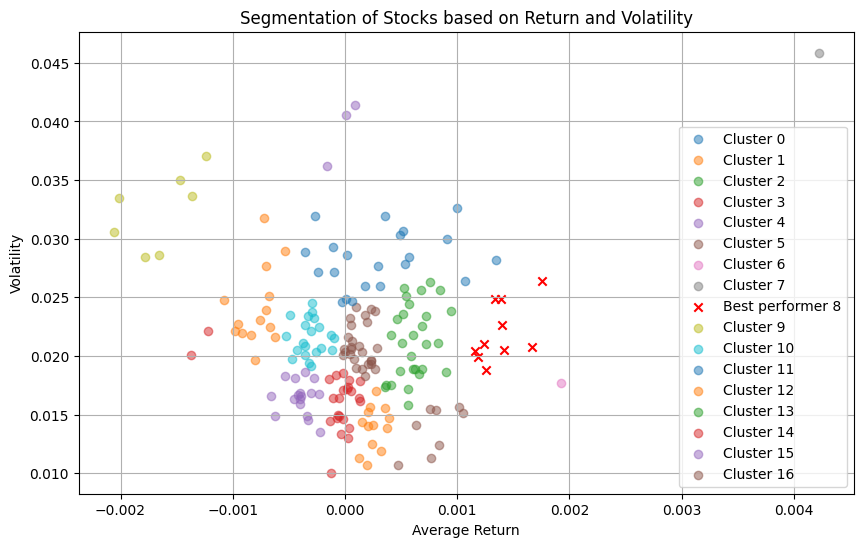

['ANET', 'AVGO', 'CDNS', 'DECK', 'FICO', 'GE', 'KLAC', 'NRG', 'PWR', 'SNPS']

In [424]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

def Create_Sentiment_Performance_Model( market_data):
    df0 = pd.read_csv('NewsRegisterSentiment2021.csv')
    df1 = pd.read_csv('NewsRegisterSentiment2022.csv')
    df2 = pd.read_csv('NewsRegisterSentiment2023.csv')
    df3 = pd.read_csv('NewsRegisterSentiment2024.csv')
    df0['Date'] = pd.to_datetime(df0['Date'])
    df1['Date'] = pd.to_datetime(df1['Date'])
    df2['Date'] = pd.to_datetime(df2['Date'])
    df3['Date'] = pd.to_datetime(df3['Date'])
    max_date = df3['Date'].max()
    #print(max_date)
    thirty_days_before_max = max_date - timedelta(days=30)
    df4 = df3[df3['Date'] <= thirty_days_before_max]

    df_fit = df3[df3['Date'] > thirty_days_before_max]

    df_union = pd.concat([df0,df1, df2,df4])

    data_close=market_data.transpose().dropna().transpose()
    returns = np.log(data_close / data_close.shift(1))
    #print(data_close)
    #print(df_fit)
    #print(df_union)
    # Initialize a dictionary to store the models for each day
    models = {}

    # Iterate over different days
    for day in range(30, 31):
        prev_30d_avg_return = returns.rolling(day).mean().shift(1)
        next_30d_avg_return = returns.shift(-day).rolling(day).mean()

        # Calculate the percentual difference in return
        percentual_diff_return = next_30d_avg_return / prev_30d_avg_return - 1

        # Calculate the volatility from 30 days before
        volatility = returns.rolling(day).std().shift(1)

        # Unpivot or "melt" the returns, percentual difference in return, and volatility DataFrames
        prev_returns_melted = prev_30d_avg_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='prev_30d_avg_return')
        percentual_diff_return_melted = percentual_diff_return.reset_index().melt(id_vars='Date', var_name='stock', value_name='percentual_diff_return')
        volatility_melted = volatility.reset_index().melt(id_vars='Date', var_name='stock', value_name='volatility')

        df_union['Date'] = pd.to_datetime(df_union['Date'])
        prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
        percentual_diff_return_melted['Date'] = pd.to_datetime(percentual_diff_return_melted['Date'])
        volatility_melted['Date'] = pd.to_datetime(volatility_melted['Date'])

        df_fit['Date'] = pd.to_datetime(df_fit['Date'])
        prev_returns_melted['Date'] = pd.to_datetime(prev_returns_melted['Date'])
        percentual_diff_return_melted['Date'] = pd.to_datetime(percentual_diff_return_melted['Date'])
        volatility_melted['Date'] = pd.to_datetime(volatility_melted['Date'])

        # Merge the melted returns, percentual difference in return, and volatility DataFrames with the sentiment DataFrame
        df = pd.merge(df_union.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
        df = pd.merge(df, percentual_diff_return_melted, on=['Date', 'stock'], how='inner')
        df = pd.merge(df, volatility_melted, on=['Date', 'stock'], how='inner')

        df_train = pd.merge(df_fit.melt(id_vars='Date', var_name='stock'), prev_returns_melted, on=['Date', 'stock'], how='inner')
        df_train = pd.merge(df_train, percentual_diff_return_melted, on=['Date', 'stock'], how='inner')
        df_train = pd.merge(df_train, volatility_melted, on=['Date', 'stock'], how='inner')

        # Drop rows with NaN values
        #print(df.head())
        df = df.dropna()
        df_train = df_train.dropna()
        
        # Convert the percentual difference in return to a categorical variable
        df['return_increase'] = (df['percentual_diff_return'] > 0).astype(int)

        # Prepare the features (X) and the target (y)
        X = df[['value', 'volatility']]
        X_pred = df_train[['value', 'volatility']]
        y = df['return_increase']

        # Normalize the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Define the model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Print the accuracy
        print(f'Accuracy for day {day}:', accuracy)

        # Print the confusion matrix
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        y_pred = model.predict(X_pred)
        print(y_pred)

        
        models[day] = model
    
    mask = y_pred == 1
    X_pred_selected = df_train[mask]
    unique=X_pred_selected['stock'].unique()
    unique
    retval = Create_Kmeans_Portfolio_f10(market_data[unique])
    return retval

y_pred = Create_Sentiment_Performance_Model( port.market_data)
y_pred.symbols


Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


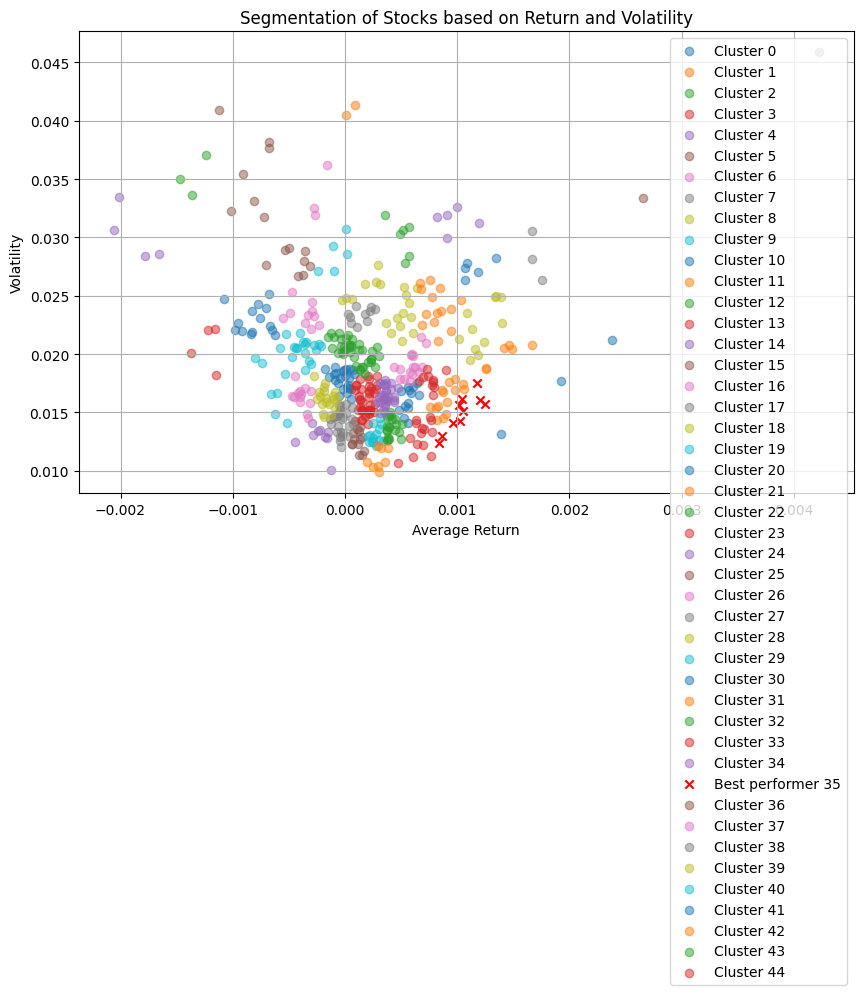

In [426]:
Create_Kmeans_Portfolio_f10(port.market_data)

A continuación se crearán los modelos alternativos para ser evaluados, se tiene la hipótesis que el portafolio incfluenciado por el análisis de sentimientos tendrá un rendimiento positivo en los próximos días y estará entre los portafolios con mejores rendimientos

Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


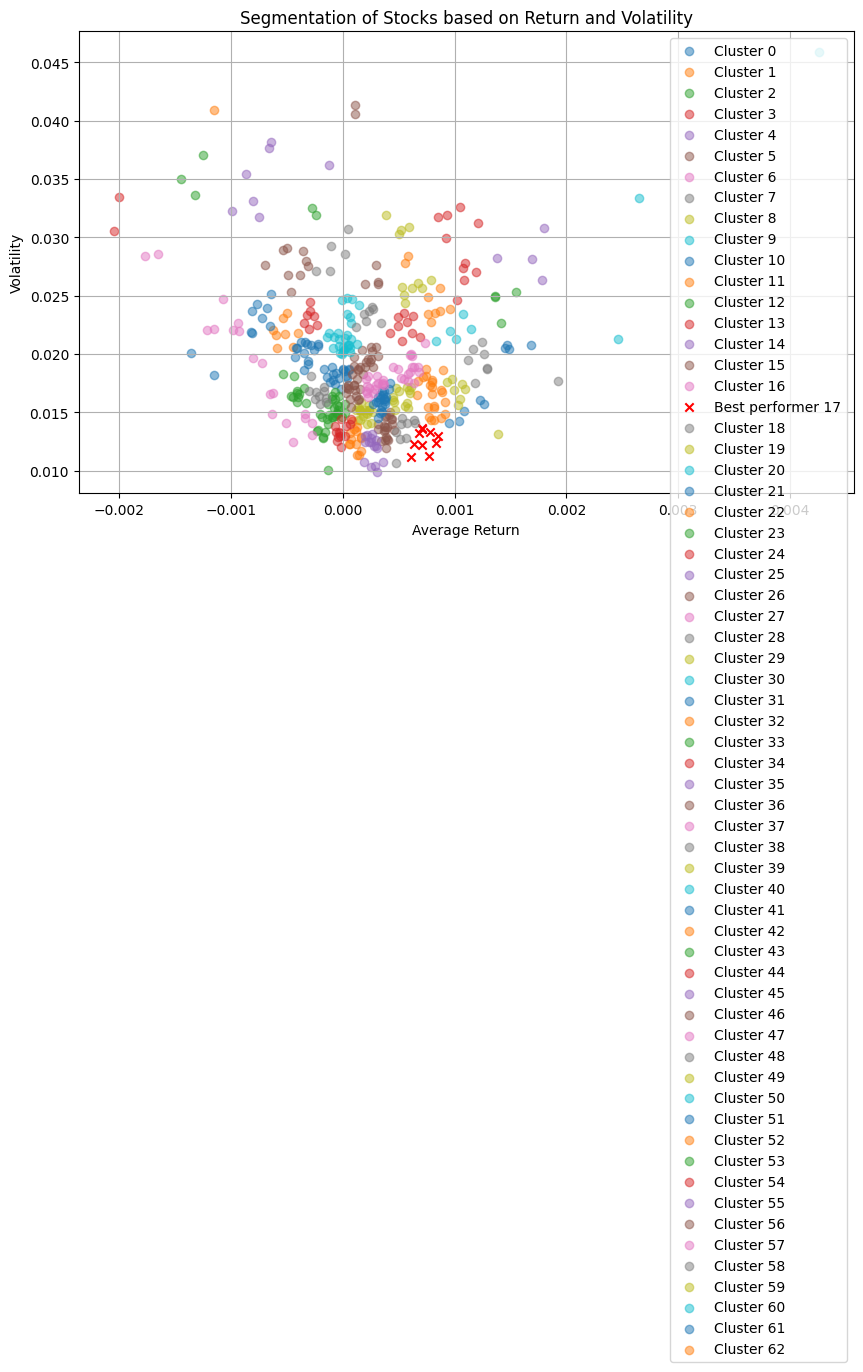

Selected Stocks with Highest Return/Risk Ratio:
8


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


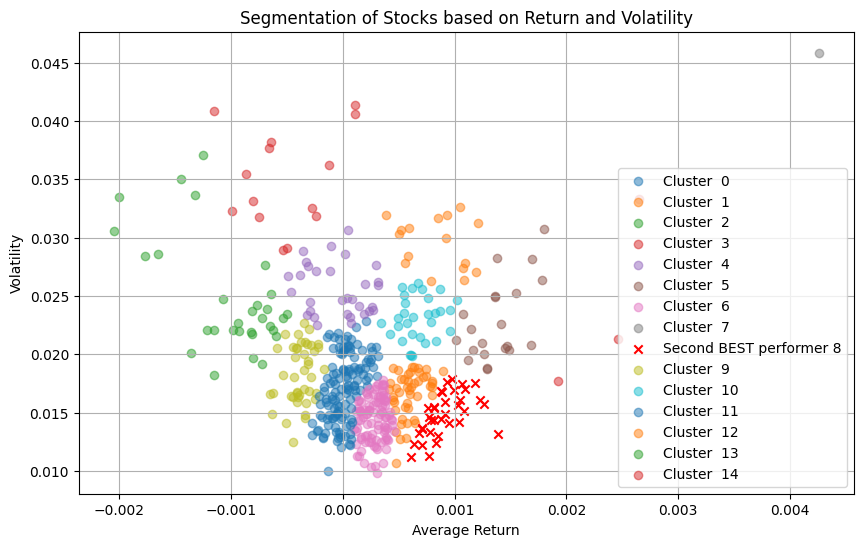

Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


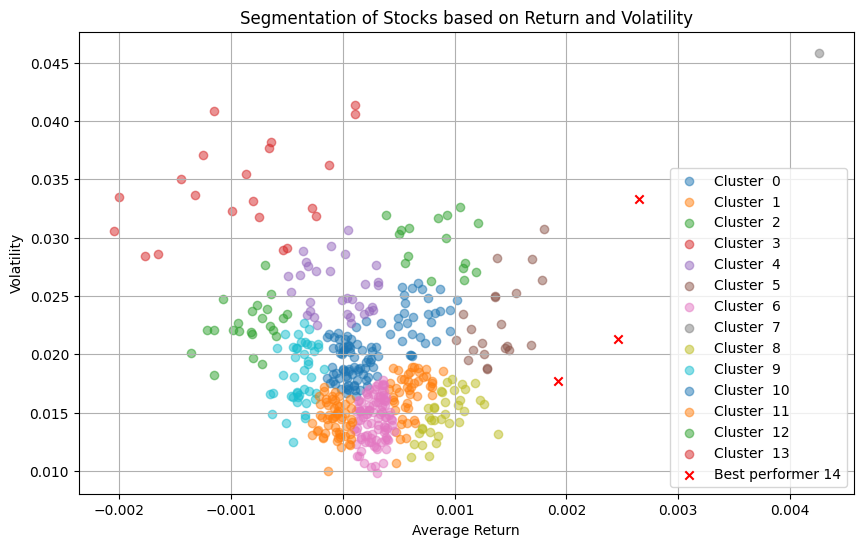

/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0['Date'] = pd.to_datetime(df0['Date'])
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/1554347199.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fi

Accuracy for day 30: 0.7252860707218446
Confusion Matrix:
[[48866  4966]
 [14192  1714]]
[1 0 0 ... 0 0 0]
Selected Stocks with Highest Return/Risk Ratio:


/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


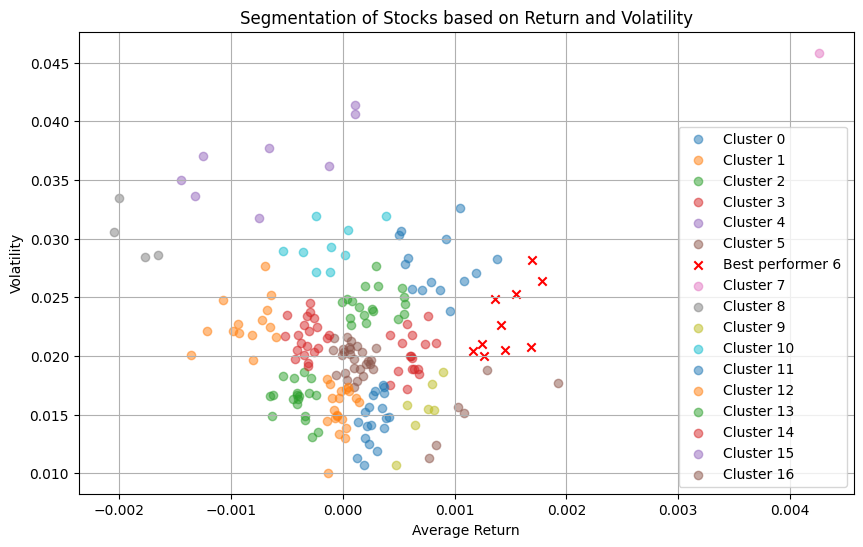

18:06:51 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:52 - cmdstanpy - INFO - Chain [1] start processing
18:06:52 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing
18:06:53 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1]

Symbols with the best growth according to the projections:
['BALL', 'CF', 'CTAS', 'ATO', 'CI', 'VRSN', 'NUE', 'AEE', 'ACN']


18:08:42 - cmdstanpy - INFO - Chain [1] start processing
18:08:42 - cmdstanpy - INFO - Chain [1] done processing


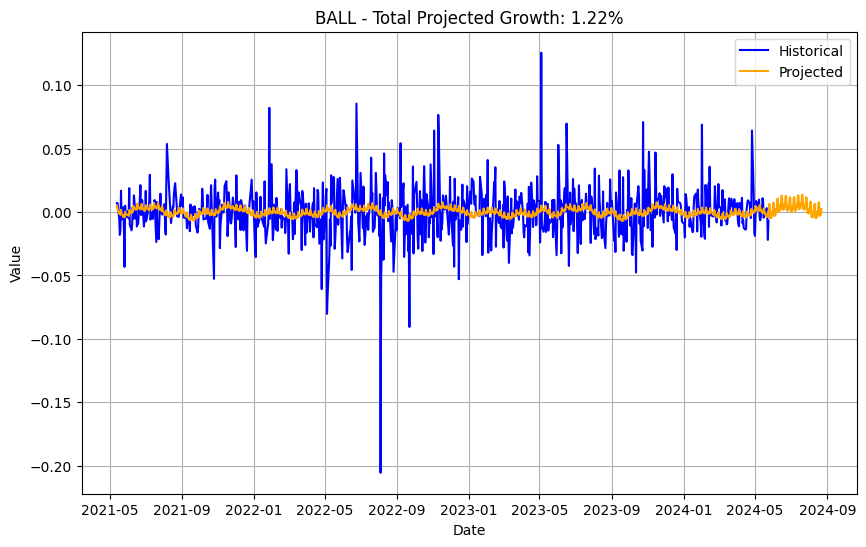

18:08:42 - cmdstanpy - INFO - Chain [1] start processing
18:08:42 - cmdstanpy - INFO - Chain [1] done processing


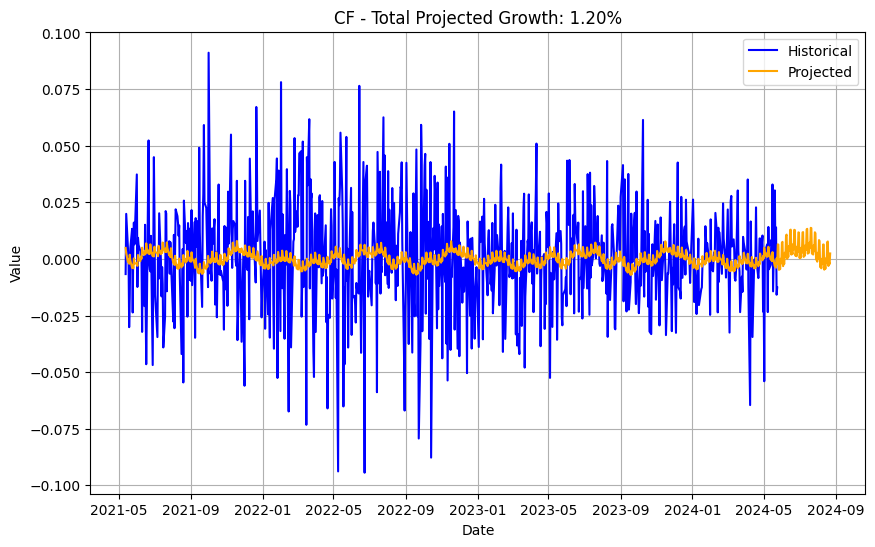

18:08:42 - cmdstanpy - INFO - Chain [1] start processing
18:08:42 - cmdstanpy - INFO - Chain [1] done processing


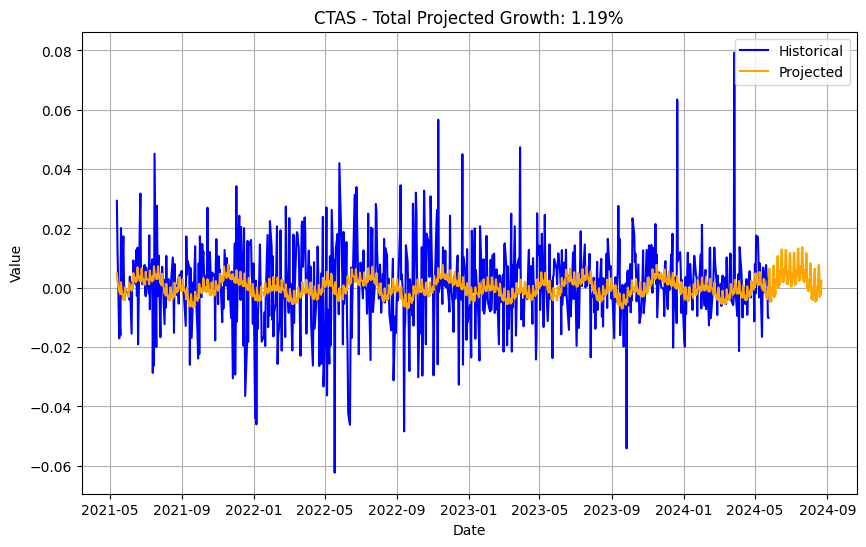

18:08:43 - cmdstanpy - INFO - Chain [1] start processing
18:08:43 - cmdstanpy - INFO - Chain [1] done processing


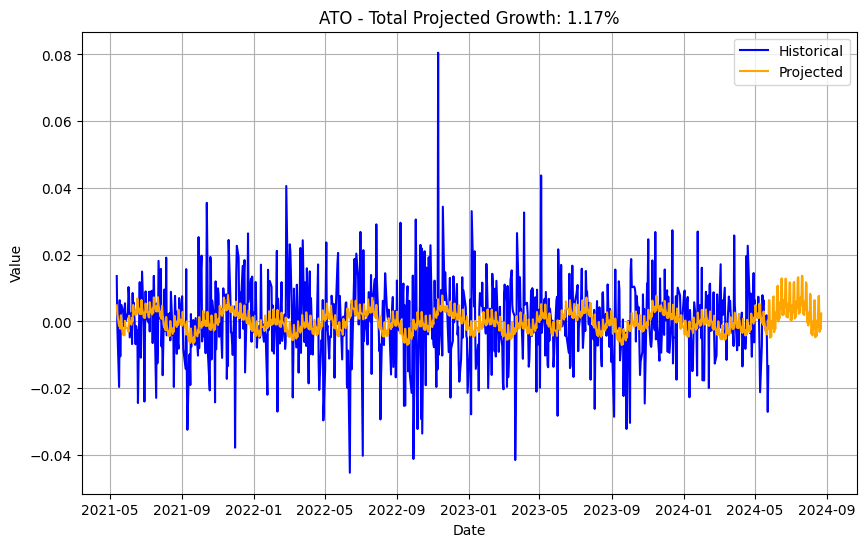

18:08:43 - cmdstanpy - INFO - Chain [1] start processing
18:08:43 - cmdstanpy - INFO - Chain [1] done processing


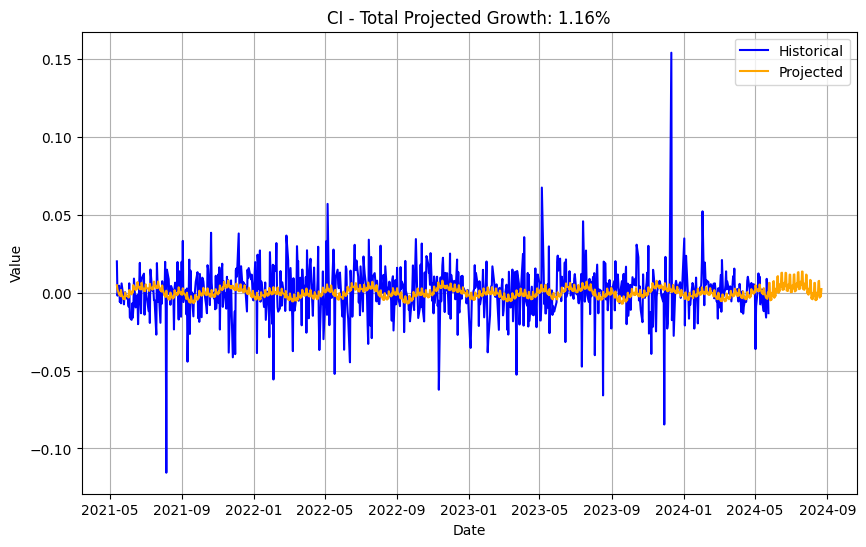

18:08:44 - cmdstanpy - INFO - Chain [1] start processing
18:08:44 - cmdstanpy - INFO - Chain [1] done processing


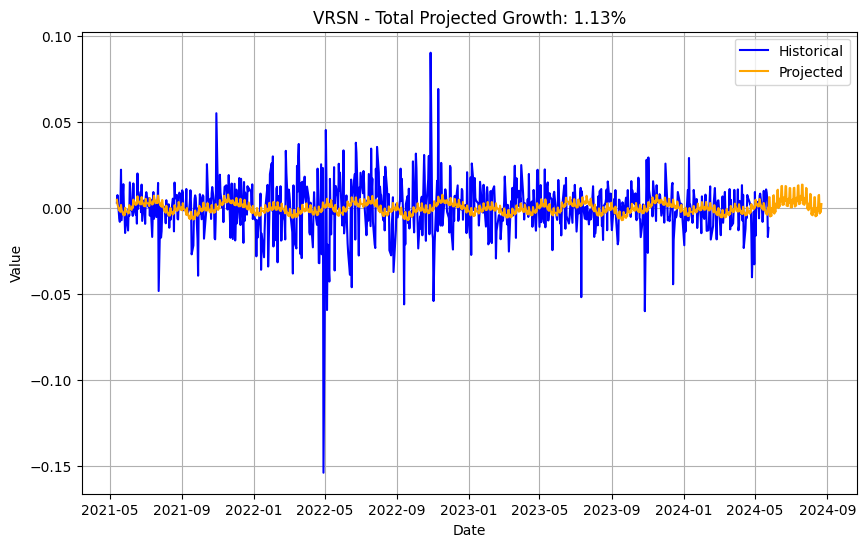

18:08:44 - cmdstanpy - INFO - Chain [1] start processing
18:08:44 - cmdstanpy - INFO - Chain [1] done processing


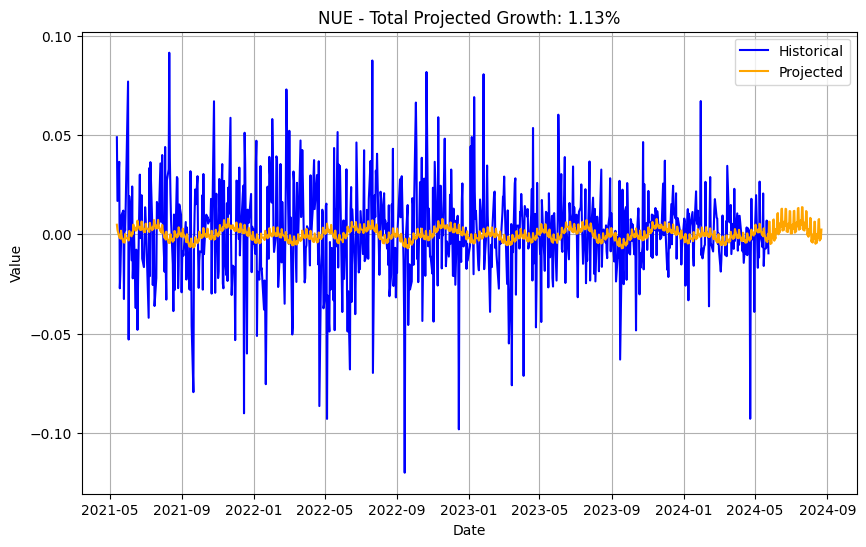

18:08:44 - cmdstanpy - INFO - Chain [1] start processing
18:08:44 - cmdstanpy - INFO - Chain [1] done processing


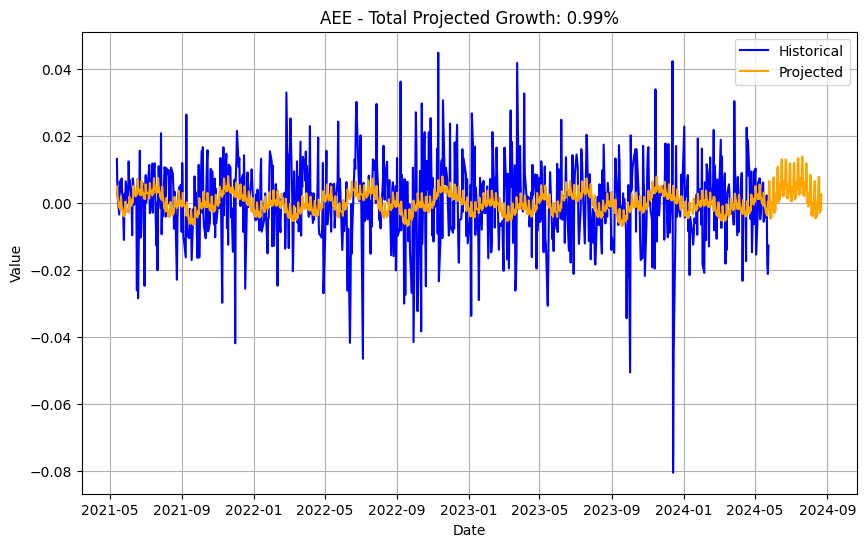

18:08:45 - cmdstanpy - INFO - Chain [1] start processing
18:08:45 - cmdstanpy - INFO - Chain [1] done processing


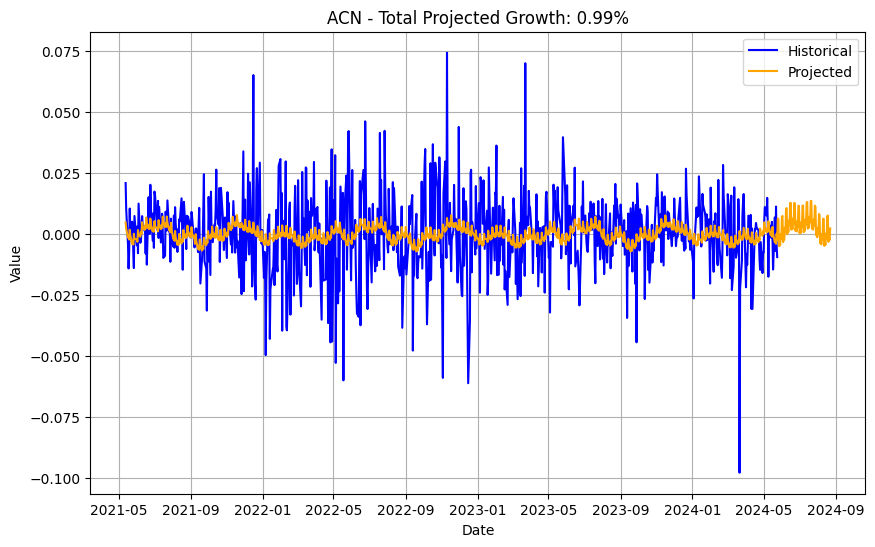

/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/fbarahona/Library/Python/3.9/lib/python/site-packages/

In [432]:
port.create_portfolio(Create_Kmeans_Portfolio_f10)
port.create_portfolio(Create_Kmeans_Portfolio_Second_Best)
port.create_portfolio(Create_Kmeans_Portfolio)
port.create_portfolio(Create_Sentiment_Performance_Model)
port.create_portfolio(Create_Prophet_Portfolio_Second_Best)
port.create_portfolio(Create_More_Risky_Peformers_Portfolio)
port.create_portfolio(Create_Best_Peformers_Portfolio)

A continuación se presnta ls distribución de los portafolios tal y como quedaron configurados, note que los que tienen mayores opciones de retorno son los bets performers y el portafolio de k medias que considera datos atípicos

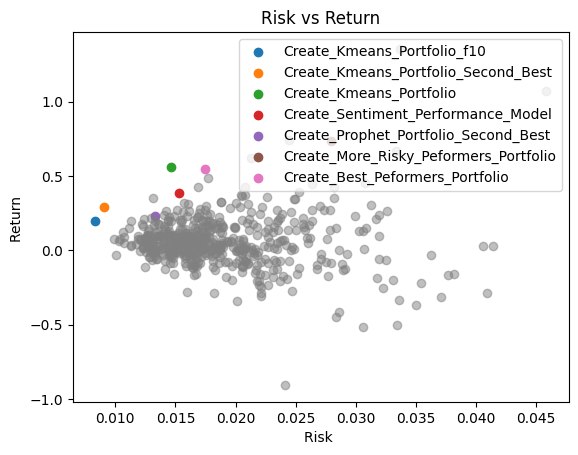

In [433]:
port.plot_risk_vs_return()

Evaluación de Modelos:

Yas se definieron los modelos, a partir del 24 de mayo se estarán cargando los datos de los precios de los stocks y se estará evaluando el retonro para obtener conclusiones.

Por el moment y solamente con un día de información  el portafoliko de best peformers, más volatil y el influenciado por sentimientos son los que han generado un mayor retorno. 

Una Semana Después

Después de una semana se puede concluir que hasta el momento el modelo con el mejor retorno de inversión es en que maximiza los stocks con mejores rendimientos, ha generado un retorno de 7% en la primera semana, el segundo portafolio más rentable es el seleccionado por medio de K-Medias, dado que ha generaado un rendimiento del 3% en una semana.

El modelo basado en análisis de sentimiento ha generado bastantes movimientos, debido a la diversifiación del mismo no ha generado ni pérdidas ni ganancias, sin embargo es muy impotante destacar que el modelo fue probado con datos al 4 de mayo y que los stocks o activos seleccionados generaron un rendimiento muy interesante en las siguientes 2 semamanas, por lo tanto se puede concluir que este modelo podría funcionar para inversiones a corto plazo, es decir utilizar las noticias para invertir por dos semenas en los stocks, después que pasa la noticia las acciones tienden a bajar de precio.

[*********************100%%**********************]  503 of 503 completed
/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


Create_Kmeans_Portfolio_f10
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_f10 - Sum of Weighted Returns: -0.01
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
0    AFL        86.839996         89.870003    0.10  3.489183         0.003489
3   CBOE       180.259995        172.990005    0.12 -4.033057        -0.004840
4    COR       219.464996        226.570007    0.20  3.237423         0.006475
5     GD       296.704987        299.769989    0.08  1.033013         0.000826
7    MRK       130.994995        125.540001    0.27 -4.164277        -0.011244
8    RSG       186.244995        185.190002    0.23 -0.566454        -0.001303


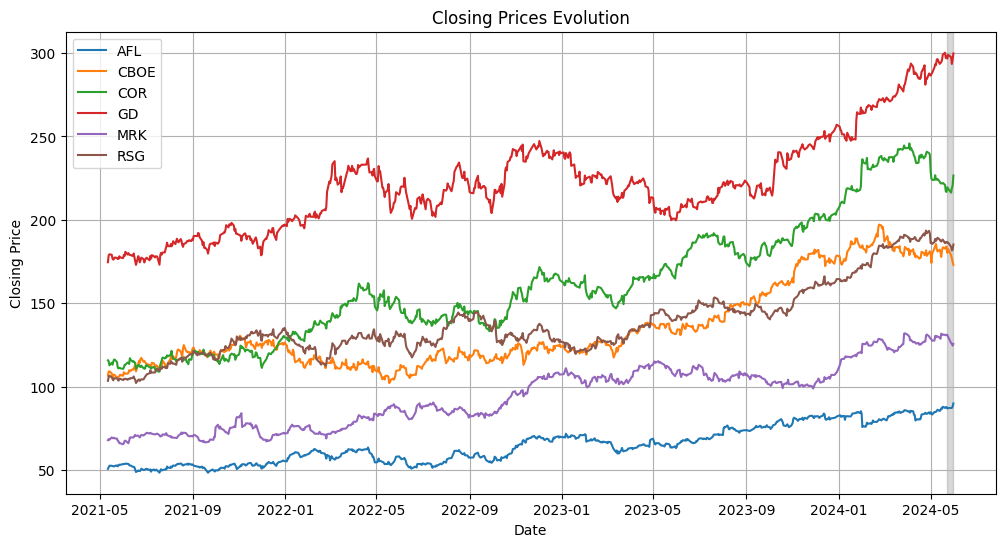

Create_Kmeans_Portfolio_Second_Best
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Kmeans_Portfolio_Second_Best - Sum of Weighted Returns: 0.00
   Symbol  Avg Close Price  Last Close Price  Weight    Return  \
0    ACGL       101.731499        102.629997    0.10  0.883206   
3     APH       136.500000        132.369995    0.04 -3.025645   
9    CBOE       180.259995        172.990005    0.01 -4.033057   
11   COST       797.750000        809.890015    0.10  1.521782   
13    ETN       338.329987        332.850006    0.07 -1.619715   
16   HUBB       401.119995        388.890015    0.01 -3.048958   
18    IRM        79.264999         80.690002    0.03  1.797771   
19    MCK       558.289978        569.590027    0.35  2.024047   
21    MRK       130.994995        125.540001    0.15 -4.164277   
25    PGR       203.679993        211.179993    0.01  3.682247   
26   REGN       980.880005        980.159973    0.02 -0.073407   
30   VRTX       450.970001        455.

/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


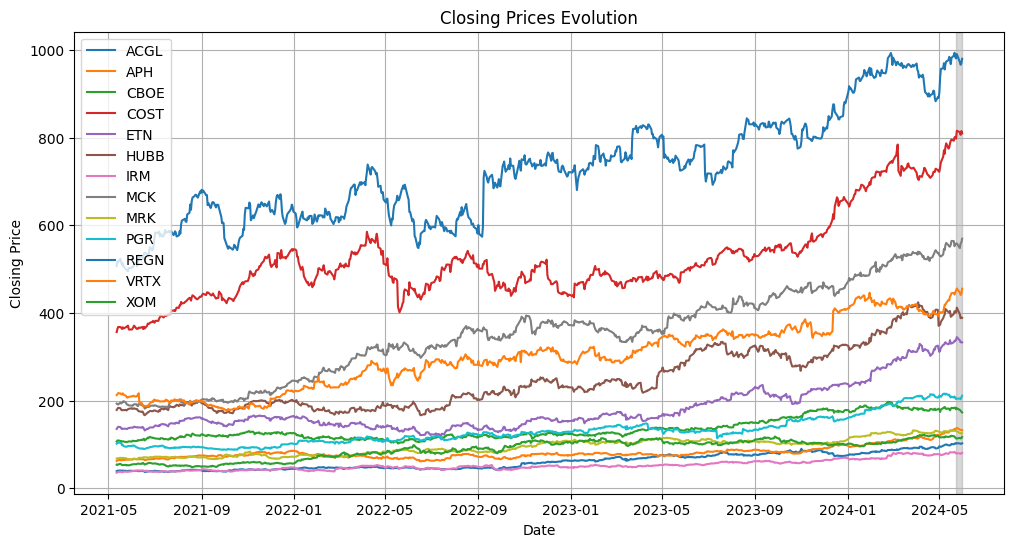

Create_Kmeans_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Kmeans_Portfolio - Sum of Weighted Returns: 0.03
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
0    LLY       807.780029        820.340027    0.47  1.554878         0.007308
1   NVDA      1039.860718       1096.329956    0.11  5.430462         0.005974
2    VST        96.199997         99.080002    0.42  2.993768         0.012574


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


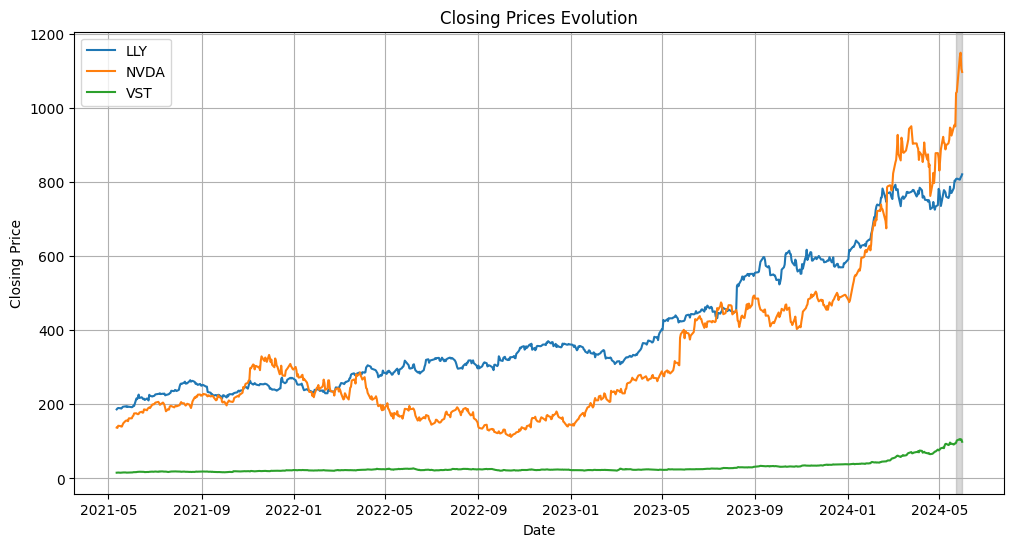

Create_Sentiment_Performance_Model
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Sentiment_Performance_Model - Sum of Weighted Returns: 0.00
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
0   ANET       301.550995        297.649994    0.08  -1.293646   
1   AVGO      1393.948853       1328.550049    0.27  -4.691621   
2   BLDR       166.490005        160.789993    0.02  -3.423636   
4   DECK       905.164978       1093.920044    0.11  20.853112   
5   FICO      1356.604980       1289.930054    0.11  -4.914837   
7    NRG        81.320000         81.000000    0.23  -0.393507   
8    PWR       277.529999        275.940002    0.19  -0.572910   

   Weighted Return  
0        -0.001035  
1        -0.012667  
2        -0.000685  
4         0.022938  
5        -0.005406  
7        -0.000905  
8        -0.001089  


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


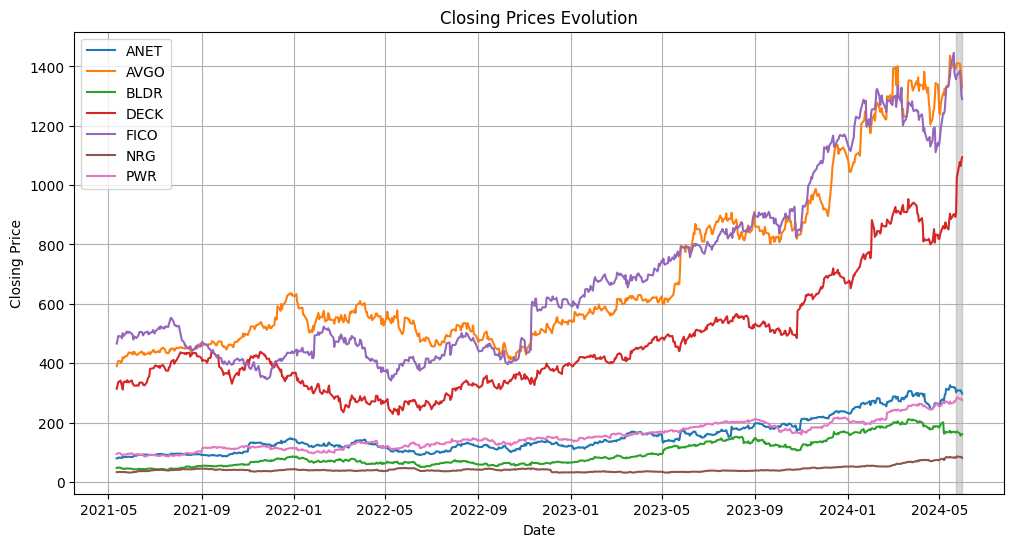

Create_Prophet_Portfolio_Second_Best
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Prophet_Portfolio_Second_Best - Sum of Weighted Returns: -0.02
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
1     CF        78.430000         79.730003    0.08  1.657533         0.001326
2   CTAS       694.780029        677.969971    0.89 -2.419479        -0.021533
6    NUE       171.580002        168.850006    0.03 -1.591092        -0.000477


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


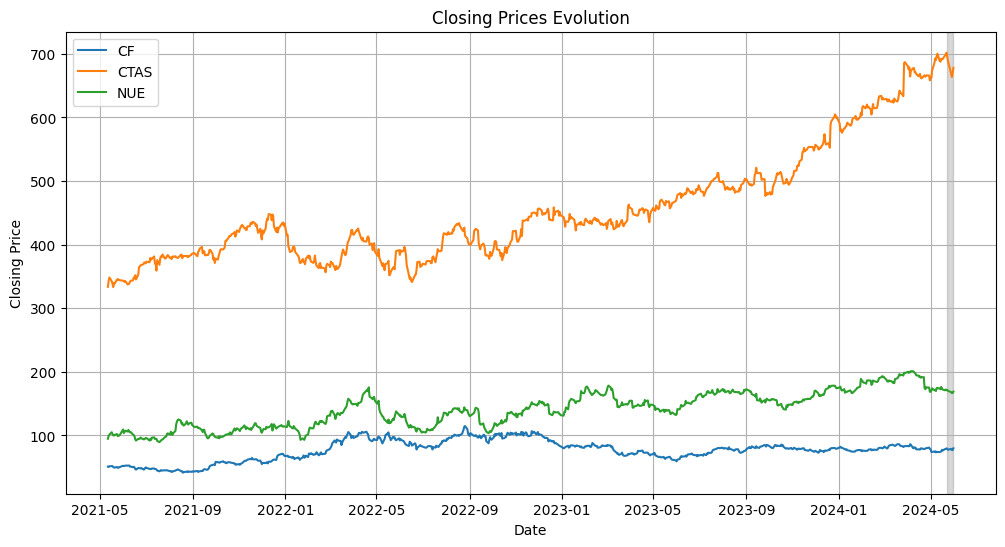

Create_More_Risky_Peformers_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_More_Risky_Peformers_Portfolio - Sum of Weighted Returns: -0.01
  Symbol  Avg Close Price  Last Close Price  Weight    Return  Weighted Return
0   SMCI       842.500000        784.510010    0.46 -6.883085        -0.031662
4   BLDR       166.490005        160.789993    0.18 -3.423636        -0.006163
5   FSLR       249.524994        271.760010    0.36  8.910937         0.032079


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


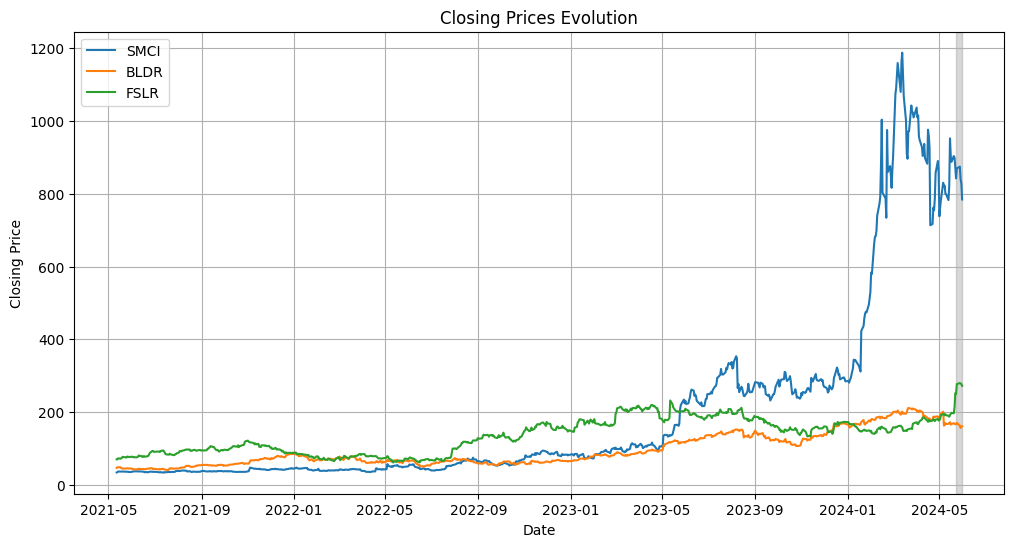

Create_Best_Peformers_Portfolio
from:
2024-05-23 00:00:00
to:
2024-05-31 00:00:00
Portfolio Name: Create_Best_Peformers_Portfolio - Sum of Weighted Returns: 0.07
  Symbol  Avg Close Price  Last Close Price  Weight     Return  \
1   FSLR       249.524994        271.760010    0.12   8.910937   
2    VST        96.199997         99.080002    0.65   2.993768   
5    HWM        82.525002         84.650002    0.08   2.574977   
6   DECK       905.164978       1093.920044    0.16  20.853112   

   Weighted Return  
1         0.010693  
2         0.019459  
5         0.002060  
6         0.033365  


/var/folders/8n/v5h632s55pg_d9cy6vpflhw00000gn/T/ipykernel_77096/2299061108.py:165: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  max_date_before_begin = self.market_data[self.market_data.index < pd.to_datetime(pdate)].index.max()


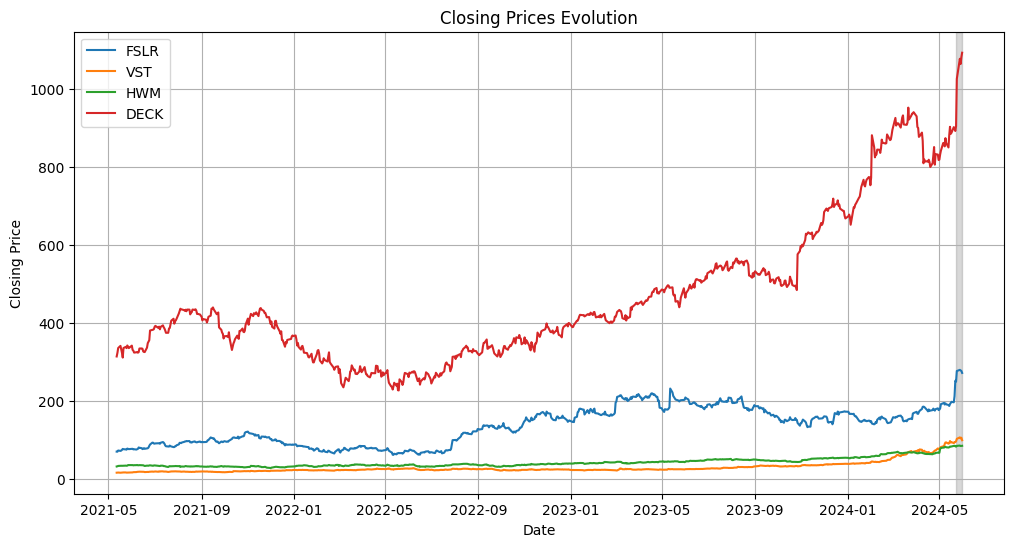

In [445]:
port.update_market_data()
port.portfolio_start_date='24-05-2024'
for i, portfolio in enumerate(port.portfolios):        
            portfolio.market_data=port.market_data
port.print_stock_return_details()

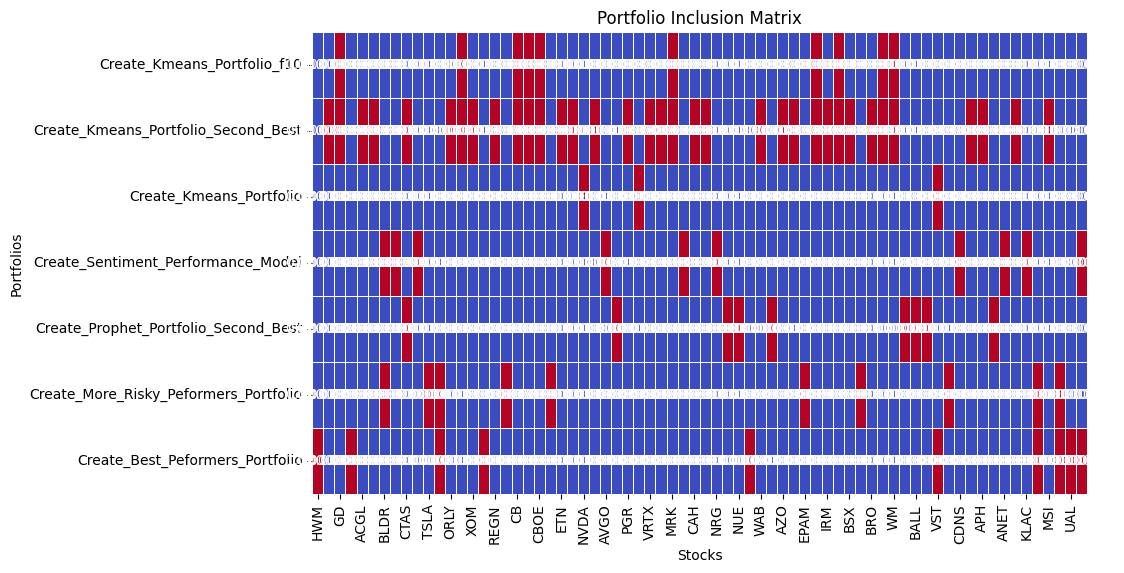

In [435]:

port.plot_portfolio_matrix()